# dependencies

In [1]:
# %pip install fast_ml
# %pip install XGBoost
# %pip install plotly
# %pip install tqdm

In [2]:
# standard ML library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,8)})

# tambahan
import plotly.express as px
from sklearn import tree
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


# Preprocess
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

# Tuning
from sklearn.model_selection import validation_curve, LeaveOneOut, train_test_split, cross_val_score, KFold, cross_validate, GridSearchCV
from sklearn.feature_selection import SelectKBest, SelectPercentile, chi2, SelectFromModel, f_regression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, auc, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error, f1_score, precision_score, recall_score
from fast_ml.model_development import train_valid_test_split

# models
from sklearn.linear_model import LogisticRegression, Perceptron, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# deksripsi

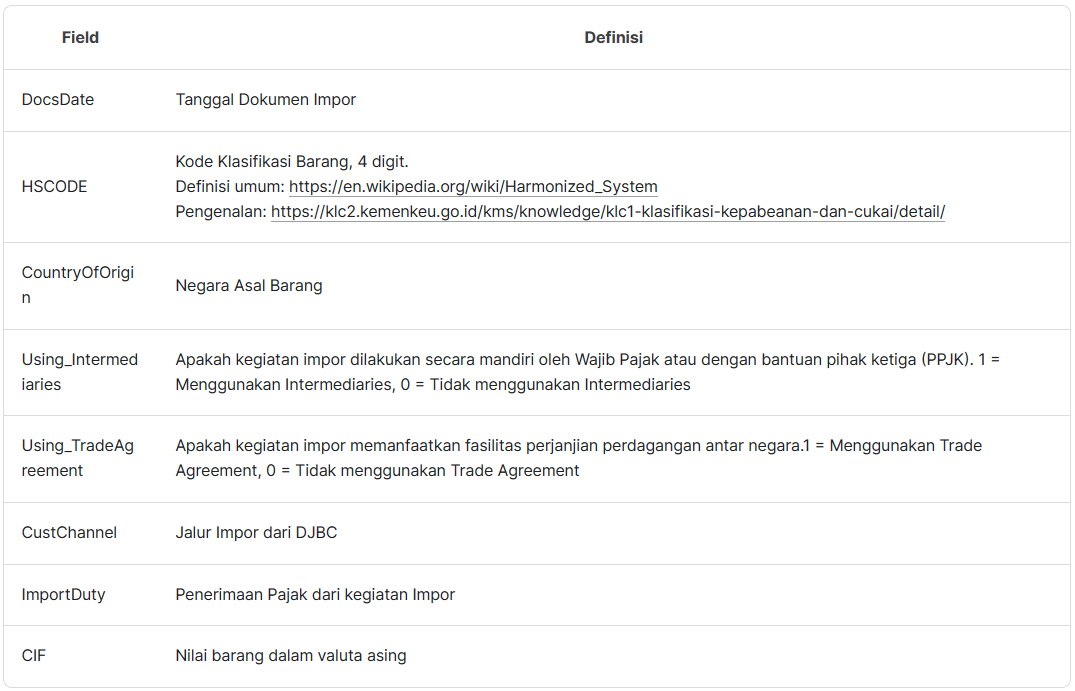

# data prep

In [3]:
# import data

df_test = pd.read_csv('./data_testing.csv', sep=';')
df_train = pd.read_csv('./data_training.csv', sep=';')

In [4]:
# cek isi df_test

df_test.head()

,ID,DocsDate,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,C1,02/01/2022,28212800050,41584240,USD,0,0,NZ,206
1,C2,12/11/2022,259418090,13014510,JPY,0,0,JP,4016
2,C3,16/11/2022,2597872060,1413620,USD,0,0,TH,7318
3,C4,03/09/2022,11550943500,15789680,USD,1,1,CN,8708
4,C5,04/04/2022,1871500400,95652240,JPY,1,0,JP,3926


In [5]:
# cek isi df_train

df_train.head()

,DocsDate,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
0,09/10/2022,254458953,170458,USD,0,0,TH,8708,Green
1,02/05/2022,1719402722,1237513,USD,0,0,MY,4016,Green
2,02/04/2022,662630024,40640204,JPY,0,0,JP,7318,Green
3,08/05/2022,7443742,1159783,JPY,1,0,CN,8443,Green
4,02/08/2022,20795848,207958981,IDR,0,0,MX,8708,Green


In [6]:
# cek info df_train

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459965 entries, 0 to 459964
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   DocsDate              459965 non-null  object
 1   ImportDuty_IDR        459965 non-null  int64 
 2   CIF                   459965 non-null  object
 3   Valuta_CIF            459965 non-null  object
 4   Using_Intermediaries  459965 non-null  int64 
 5   Using_TradeAgreement  459965 non-null  int64 
 6   COuntryOfOrigin       459962 non-null  object
 7   HSCODE                459965 non-null  int64 
 8   CustChannel           459965 non-null  object
dtypes: int64(4), object(5)
memory usage: 31.6+ MB


In [7]:
# cek info df_test

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    39996 non-null  object
 1   DocsDate              39996 non-null  object
 2   ImportDuty_IDR        39996 non-null  int64 
 3   CIF                   39996 non-null  int64 
 4   Valuta_CIF            39996 non-null  object
 5   Using_Intermediaries  39996 non-null  int64 
 6   Using_TradeAgreement  39996 non-null  int64 
 7   COuntryOfOrigin       39996 non-null  object
 8   HSCODE                39996 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.7+ MB


In [8]:
# dekripsi df_train

print(df_train.describe())
print('\n')
print(df_train.describe(include=['object']))

       ImportDuty_IDR  Using_Intermediaries  Using_TradeAgreement  \
count    4.599650e+05         459965.000000         459965.000000   
mean     1.982990e+09              0.567669              0.104404   
std      2.801461e+10              0.495400              0.305784   
min      5.040000e+02              0.000000              0.000000   
25%      2.288465e+07              0.000000              0.000000   
50%      1.063752e+08              1.000000              0.000000   
75%      5.383444e+08              1.000000              0.000000   
max      9.744041e+12              1.000000              1.000000   

              HSCODE  
count  459965.000000  
mean     6942.426245  
std      2197.217208  
min       102.000000  
25%      6109.000000  
50%      7326.000000  
75%      8512.000000  
max      9803.000000  


          DocsDate     CIF Valuta_CIF COuntryOfOrigin CustChannel
count       459965  459965     459965          459962      459965
unique         307  226971         20

In [9]:
# dekripsi df_test

print(df_test.describe())
print('\n')
print(df_test.describe(include=['object']))

       ImportDuty_IDR           CIF  Using_Intermediaries  \
count    3.999600e+04  3.999600e+04          39996.000000   
mean     1.986692e+10  1.187732e+10              0.566707   
std      1.999207e+11  2.436907e+11              0.495536   
min      3.021000e+04  5.000000e+01              0.000000   
25%      2.333660e+08  5.104200e+05              0.000000   
50%      1.075966e+09  4.838055e+06              1.000000   
75%      5.284103e+09  6.860598e+07              1.000000   
max      2.492662e+13  2.705595e+13              1.000000   

       Using_TradeAgreement        HSCODE  
count          39996.000000  39996.000000  
mean               0.104585   6945.351435  
std                0.306022   2202.633563  
min                0.000000    102.000000  
25%                0.000000   6109.000000  
50%                0.000000   7411.000000  
75%                0.000000   8512.000000  
max                1.000000   9803.000000  


           ID    DocsDate Valuta_CIF COuntryOfOrigin

## global

In [10]:
# samakan kolom df_train dengan df_test

df_train.drop('DocsDate', axis=1, inplace=True)
df_test.drop('DocsDate', axis=1, inplace=True)

print(df_train.columns)
print(df_test.columns)

Index(['ImportDuty_IDR', 'CIF', 'Valuta_CIF', 'Using_Intermediaries',
       'Using_TradeAgreement', 'COuntryOfOrigin', 'HSCODE', 'CustChannel'],
      dtype='object')
Index(['ID', 'ImportDuty_IDR', 'CIF', 'Valuta_CIF', 'Using_Intermediaries',
       'Using_TradeAgreement', 'COuntryOfOrigin', 'HSCODE'],
      dtype='object')


In [11]:
# trim whitespace semua kolom yang aslinya string

df_train = df_train.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_test = df_test.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [12]:
# clean missing value, karena cuma ada di COuntryOfOrigin di df_train dan cuma 3 baris jadi langsung hapus saja semua seharusnya nggak berpengaruh

df_train.dropna(inplace=True)
df_train.isna().sum()

ImportDuty_IDR          0
CIF                     0
Valuta_CIF              0
Using_Intermediaries    0
Using_TradeAgreement    0
COuntryOfOrigin         0
HSCODE                  0
CustChannel             0
dtype: int64

In [13]:
# buang duplicate
# df_train.drop_duplicates(inplace=True)

## CIF

In [14]:
# karena nomor formatnya sebaiknya integer
# df_test tidak perlu diganti karena sudah integer

# hilangkan koma
df_train['CIF'] = df_train['CIF'].str.replace(',', '')

# ubah tipe
df_train['CIF'] = df_train['CIF'].astype('float').astype('int64')

df_train['CIF'].head()

0       170458
1      1237513
2     40640204
3      1159783
4    207958981
Name: CIF, dtype: int64

## HSCODE 

In [15]:
# sepertinya seharusnya kategorikal karena itu kan kode untuk jenis barang bukan continuous

# ubah jadi string
df_train['HSCODE'] = df_train['HSCODE'].astype('str')
df_test['HSCODE'] = df_test['HSCODE'].astype('str')

In [16]:
# untuk jaga jaga coba list unique value masing masing df siapa tahu ada yang kelebihan digit
df_train['HSCODE'].unique()

array(['8708', '4016', '7318', '8443', '7307', '8537', '7415', '3923',
       '8529', '2103', '7223', '3812', '8482', '8414', '8412', '9209',
       '9026', '8302', '8421', '7215', '9603', '3302', '3304', '8511',
       '3907', '8466', '4009', '2512', '8431', '3811', '3209', '1202',
       '4411', '8487', '808', '3917', '8483', '6109', '8539', '8419',
       '6104', '7214', '8413', '5609', '3208', '7210', '3004', '3926',
       '8484', '7320', '8515', '4002', '8535', '4202', '8512', '8501',
       '5607', '8536', '3305', '5402', '8424', '8538', '3911', '3919',
       '8481', '2005', '4910', '4010', '8544', '8547', '6804', '9610',
       '3809', '4011', '7609', '8714', '8518', '202', '9106', '4819',
       '2309', '4421', '2922', '2106', '5806', '8308', '8409', '3206',
       '8205', '9503', '7009', '3402', '2710', '8301', '7308', '3909',
       '4802', '8514', '1901', '4814', '712', '7217', '1805', '2834',
       '8480', '3212', '9617', '7315', '2916', '3207', '8508', '8546',
       '8

In [17]:
# ternyata banyak, tapi menurut website BC bisa dikategorikan per 2 digit depan, namun ada yang cuma 3 digit jadi harus dibetulkan dulu

df_train['HSCODE'] = df_train['HSCODE'].str.zfill(4)
df_test['HSCODE'] = df_test['HSCODE'].str.zfill(4)

df_train['HSCODE'].unique()

array(['8708', '4016', '7318', '8443', '7307', '8537', '7415', '3923',
       '8529', '2103', '7223', '3812', '8482', '8414', '8412', '9209',
       '9026', '8302', '8421', '7215', '9603', '3302', '3304', '8511',
       '3907', '8466', '4009', '2512', '8431', '3811', '3209', '1202',
       '4411', '8487', '0808', '3917', '8483', '6109', '8539', '8419',
       '6104', '7214', '8413', '5609', '3208', '7210', '3004', '3926',
       '8484', '7320', '8515', '4002', '8535', '4202', '8512', '8501',
       '5607', '8536', '3305', '5402', '8424', '8538', '3911', '3919',
       '8481', '2005', '4910', '4010', '8544', '8547', '6804', '9610',
       '3809', '4011', '7609', '8714', '8518', '0202', '9106', '4819',
       '2309', '4421', '2922', '2106', '5806', '8308', '8409', '3206',
       '8205', '9503', '7009', '3402', '2710', '8301', '7308', '3909',
       '4802', '8514', '1901', '4814', '0712', '7217', '1805', '2834',
       '8480', '3212', '9617', '7315', '2916', '3207', '8508', '8546',
      

In [18]:
# mau buat library tapi kebanyakan, buang 2 digit belakang saja buat nanti onehot siapa tahu ada jenis barang yang punya korelasi
# onehot nanti saja tabel terpisah karena unique valuenya banyak

# ambil 2 digit depan

df_train['HSCODE'] = df_train['HSCODE'].str.slice(0, -2)
df_test['HSCODE'] = df_test['HSCODE'].str.slice(0, -2)

df_train['HSCODE'].unique()

array(['87', '40', '73', '84', '85', '74', '39', '21', '72', '38', '92',
       '90', '83', '96', '33', '25', '32', '12', '44', '08', '61', '56',
       '30', '42', '54', '20', '49', '68', '76', '02', '91', '48', '23',
       '29', '58', '82', '95', '70', '34', '27', '19', '07', '18', '28',
       '94', '64', '62', '35', '65', '22', '89', '69', '63', '09', '04',
       '59', '14', '57', '79', '10', '06', '80', '45', '37', '16', '03',
       '13', '11', '31', '67', '15', '98', '17', '55', '01', '60', '71',
       '24', '36', '51', '78', '75', '52', '53', '26', '05', '81', '46',
       '97', '66', '86', '93', '41'], dtype=object)

## Valuta_CIF dan COuntryOfOrigin

In [19]:
# sudah string dan sudah trim
# nanti onehot siapa tahu ada valuta atau origin yang punya korelasi

In [20]:
# onehot nanti saja pisah tabel karena unique value banyak

print(df_train['Valuta_CIF'].unique())
print(df_train['COuntryOfOrigin'].unique())

['USD' 'JPY' 'IDR' 'EUR' 'MYR' 'SGD' 'HKD' 'CNY' 'SEK' 'THB' 'GBP' 'AUD'
 'KRW' 'CHF' 'INR' 'CAD' 'NZD' 'SAR' 'PHP' 'DKK']
['TH' 'MY' 'JP' 'CN' 'MX' 'IT' 'TW' 'US' 'KR' 'DE' 'AU' 'NL' 'IN' 'VN'
 'CZ' 'HK' 'FR' 'SG' 'SA' 'BE' 'ES' 'BD' 'GB' 'BR' 'ID' 'LK' 'GR' 'PH'
 'SI' 'PK' 'NZ' 'DK' 'JO' 'TR' 'AE' 'SE' 'TN' 'ZA' 'PL' 'CU' 'AT' 'BG'
 'RO' 'IE' 'CA' 'SK' 'CH' 'OM' 'KH' 'LT' 'ET' 'EE' 'HU' 'IL' 'FI' 'RU'
 'PT' 'HN' 'BY' 'MT' 'RE' 'IR' 'NO' 'CO' 'MM' 'LU' 'EG' 'SV' 'AR' 'UA'
 'GH' 'MU' 'MC' 'BA' 'MD' 'PS' 'FJ' 'CR' 'GT' 'SD' 'HR' 'MK' 'MA' 'PE'
 'GE' 'EC' 'KW' 'CL' 'AI' 'HT' 'RW' 'DO' 'BO' 'DM' 'MZ' 'RS' 'BH' 'AF'
 'LB' 'SZ' 'LV' 'AL' 'YT' 'VI' 'TZ' 'IS' 'YU' 'MW' 'PR' 'PA' 'SL' 'NR'
 'VG' 'CM' 'MG' 'CD' 'TT' 'ZM' 'KE' 'DZ' 'GF' 'SR' 'SM' 'AM' 'TD']


# model

## korelasi

In [21]:
# kolom CustChannel perlu diencode dulu di tabel sementara

# coba cek unique value dulu
df_train['CustChannel'].unique()

array(['Green', 'Red', 'Yellow'], dtype=object)

In [22]:
# copy dulu ke tabel sementara
df_train_enc = df_train.copy()

# encode

# df_train_enc['CustChannel'] = pd.factorize(df_train_enc['CustChannel'])[0] # gabisa karena ini cuma untuk kolom dengan 2 integer

# le = LabelEncoder()
# df_train_enc['CustChannel'] = le.fit_transform(df_train_enc['CustChannel']).astype('int64') # kalau pake ini jadi nggak tau misahinnya berdasar apa

# pake library aja

cust_encode = {'Green': 0, 'Yellow': 1, 'Red': 2}
df_train_enc['CustChannel'] = df_train_enc['CustChannel'].map(cust_encode)

### data numerical

In [726]:
# cek dulu tipe data sekarang

df_train_enc.describe()

,ImportDuty_IDR,CIF,Using_Intermediaries,Using_TradeAgreement,CustChannel
count,4.225010e+05,4.225010e+05,422501.000000,422501.000000,422501.000000
mean,1.993855e+09,7.888012e+13,0.575097,0.102783,0.130291
std,2.853554e+10,3.067546e+15,0.494329,0.303676,0.447351
min,5.040000e+02,5.000000e+00,0.000000,0.000000,0.000000
25%,2.351008e+07,5.355400e+04,0.000000,0.000000,0.000000
50%,1.112498e+08,5.015130e+05,1.000000,0.000000,0.000000
75%,5.732064e+08,6.589590e+06,1.000000,0.000000,0.000000
max,9.744041e+12,1.010750e+18,1.000000,1.000000,2.000000


In [727]:
# buat tabel korelasi pearson

df_train_enc_num = df_train_enc.drop({'Valuta_CIF','COuntryOfOrigin','HSCODE'}, axis=1)

# compute correlation
df_train_enc_num_corr = df_train_enc_num.corr('pearson')

# generate heatmap correlation
df_train_enc_num_corr.style.background_gradient(cmap='coolwarm')

,ImportDuty_IDR,CIF,Using_Intermediaries,Using_TradeAgreement,CustChannel
ImportDuty_IDR,1.000000,0.058483,0.022842,0.009688,0.007707
CIF,0.058483,1.000000,0.012176,0.003811,-0.003434
Using_Intermediaries,0.022842,0.012176,1.000000,-0.110071,0.209043
Using_TradeAgreement,0.009688,0.003811,-0.110071,1.000000,-0.003641
CustChannel,0.007707,-0.003434,0.209043,-0.003641,1.000000


In [728]:
# importduty dan cif korelasi sangat kecil ke CustChannel
# tapi kenapa intermediaries dan tradeagreement juga kecil?

# coba cek R2 dengan OLS regression
x_enc_num = sm.add_constant(df_train_enc_num[['Using_Intermediaries', 'Using_TradeAgreement']])

# variabel output/dependen/target
y_enc_num = df_train_enc_num.CustChannel

# fit model
model_enc_num = sm.OLS(y_enc_num,x_enc_num).fit()

# print summary
print(model_enc_num.summary())

                            OLS Regression Results                            
Dep. Variable:            CustChannel   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     9741.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:42:09   Log-Likelihood:            -2.5011e+05
No. Observations:              422501   AIC:                         5.002e+05
Df Residuals:                  422498   BIC:                         5.003e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0174 

In [729]:
# ternyata memang kecil, tidak usah digunakan

### data categorical

#### ValutaCIF

In [730]:
# jadikan onehot dulu

df_train_enc_val = pd.get_dummies(df_train_enc, columns=['Valuta_CIF'], drop_first=False)

df_train_enc_val.iloc[:, 7:] = df_train_enc_val.iloc[:,7:].astype(int)

# buat korelasi pearson

df_train_enc_val = df_train_enc_val.drop({'ImportDuty_IDR','CIF','Using_Intermediaries', 'Using_TradeAgreement', 'COuntryOfOrigin', 'HSCODE'}, axis=1)

# compute correlation
df_train_enc_val_corr = df_train_enc_val.corr('pearson')

# generate heatmap correlation
df_train_enc_val_corr.style.background_gradient(cmap='coolwarm')

,CustChannel,Valuta_CIF_AUD,Valuta_CIF_CAD,Valuta_CIF_CHF,Valuta_CIF_CNY,Valuta_CIF_DKK,Valuta_CIF_EUR,Valuta_CIF_GBP,Valuta_CIF_HKD,Valuta_CIF_IDR,Valuta_CIF_INR,Valuta_CIF_JPY,Valuta_CIF_KRW,Valuta_CIF_MYR,Valuta_CIF_NZD,Valuta_CIF_PHP,Valuta_CIF_SAR,Valuta_CIF_SEK,Valuta_CIF_SGD,Valuta_CIF_THB,Valuta_CIF_USD
CustChannel,1.000000,0.003218,-0.001975,-0.000468,0.026468,-0.000448,-0.032156,-0.013739,0.013182,-0.053649,-0.004970,-0.091493,-0.004170,0.004305,0.013030,-0.000448,-0.000448,-0.014714,0.168739,-0.017119,0.067576
Valuta_CIF_AUD,0.003218,1.000000,-0.001846,-0.002306,-0.010350,-0.000178,-0.033000,-0.008545,-0.004373,-0.035091,-0.001979,-0.062925,-0.002530,-0.006018,-0.000668,-0.000178,-0.000178,-0.005981,-0.019633,-0.008517,-0.127092
Valuta_CIF_CAD,-0.001975,-0.001846,1.000000,-0.000316,-0.001421,-0.000024,-0.004529,-0.001173,-0.000600,-0.004816,-0.000272,-0.008637,-0.000347,-0.000826,-0.000092,-0.000024,-0.000024,-0.000821,-0.002695,-0.001169,-0.017444
Valuta_CIF_CHF,-0.000468,-0.002306,-0.000316,1.000000,-0.001775,-0.000031,-0.005659,-0.001465,-0.000750,-0.006017,-0.000339,-0.010791,-0.000434,-0.001032,-0.000114,-0.000031,-0.000031,-0.001026,-0.003367,-0.001461,-0.021794
Valuta_CIF_CNY,0.026468,-0.010350,-0.001421,-0.001775,1.000000,-0.000137,-0.025399,-0.006577,-0.003366,-0.027009,-0.001523,-0.048432,-0.001947,-0.004632,-0.000514,-0.000137,-0.000137,-0.004603,-0.015111,-0.006555,-0.097819
Valuta_CIF_DKK,-0.000448,-0.000178,-0.000024,-0.000031,-0.000137,1.000000,-0.000438,-0.000113,-0.000058,-0.000466,-0.000026,-0.000835,-0.000034,-0.000080,-0.000009,-0.000002,-0.000002,-0.000079,-0.000260,-0.000113,-0.001686
Valuta_CIF_EUR,-0.032156,-0.033000,-0.004529,-0.005659,-0.025399,-0.000438,1.000000,-0.020971,-0.010732,-0.086115,-0.004856,-0.154422,-0.006208,-0.014769,-0.001638,-0.000438,-0.000438,-0.014678,-0.048180,-0.020901,-0.311889
Valuta_CIF_GBP,-0.013739,-0.008545,-0.001173,-0.001465,-0.006577,-0.000113,-0.020971,1.000000,-0.002779,-0.022300,-0.001258,-0.039988,-0.001608,-0.003825,-0.000424,-0.000113,-0.000113,-0.003801,-0.012476,-0.005413,-0.080765
Valuta_CIF_HKD,0.013182,-0.004373,-0.000600,-0.000750,-0.003366,-0.000058,-0.010732,-0.002779,1.000000,-0.011412,-0.000644,-0.020464,-0.000823,-0.001957,-0.000217,-0.000058,-0.000058,-0.001945,-0.006385,-0.002770,-0.041331
Valuta_CIF_IDR,-0.053649,-0.035091,-0.004816,-0.006017,-0.027009,-0.000466,-0.086115,-0.022300,-0.011412,1.000000,-0.005164,-0.164209,-0.006602,-0.015706,-0.001742,-0.000466,-0.000466,-0.015608,-0.051233,-0.022226,-0.331656


In [731]:
# tidak ada yang punya korelasi besar juga

#### COuntryOfOrigin

In [732]:
# jadikan onehot dulu

df_train_enc_co = pd.get_dummies(df_train_enc, columns=['COuntryOfOrigin'], drop_first=False)

df_train_enc_co.iloc[:, 7:] = df_train_enc_co.iloc[:,7:].astype(int)

# buat korelasi pearson

df_train_enc_co = df_train_enc_co.drop({'ImportDuty_IDR','CIF','Using_Intermediaries', 'Using_TradeAgreement', 'Valuta_CIF', 'HSCODE'}, axis=1)

# compute correlation
df_train_enc_co_corr = df_train_enc_co.corr('pearson')

# generate heatmap correlation
df_train_enc_co_corr.style.background_gradient(cmap='coolwarm')

In [733]:
# aneh, juga nggak ada korelasi besar

#### HSCODE

In [734]:
# jadikan onehot dulu

df_train_enc_hs = pd.get_dummies(df_train_enc, columns=['HSCODE'], drop_first=False)

df_train_enc_hs.iloc[:, 7:] = df_train_enc_hs.iloc[:,7:].astype(int)

# buat korelasi pearson

df_train_enc_hs = df_train_enc_hs.drop({'ImportDuty_IDR','CIF','Using_Intermediaries', 'Using_TradeAgreement', 'Valuta_CIF', 'COuntryOfOrigin'}, axis=1)

# compute correlation
df_train_enc_hs_corr = df_train_enc_hs.corr('pearson')

# generate heatmap correlation
df_train_enc_hs_corr.style.background_gradient(cmap='coolwarm')

,CustChannel,HSCODE_01,HSCODE_02,HSCODE_03,HSCODE_04,HSCODE_05,HSCODE_06,HSCODE_07,HSCODE_08,HSCODE_09,HSCODE_10,HSCODE_11,HSCODE_12,HSCODE_13,HSCODE_14,HSCODE_15,HSCODE_16,HSCODE_17,HSCODE_18,HSCODE_19,HSCODE_20,HSCODE_21,HSCODE_22,HSCODE_23,HSCODE_24,HSCODE_25,HSCODE_26,HSCODE_27,HSCODE_28,HSCODE_29,HSCODE_30,HSCODE_31,HSCODE_32,HSCODE_33,HSCODE_34,HSCODE_35,HSCODE_36,HSCODE_37,HSCODE_38,HSCODE_39,HSCODE_40,HSCODE_41,HSCODE_42,HSCODE_44,HSCODE_45,HSCODE_46,HSCODE_48,HSCODE_49,HSCODE_51,HSCODE_52,HSCODE_53,HSCODE_54,HSCODE_55,HSCODE_56,HSCODE_57


## modeling

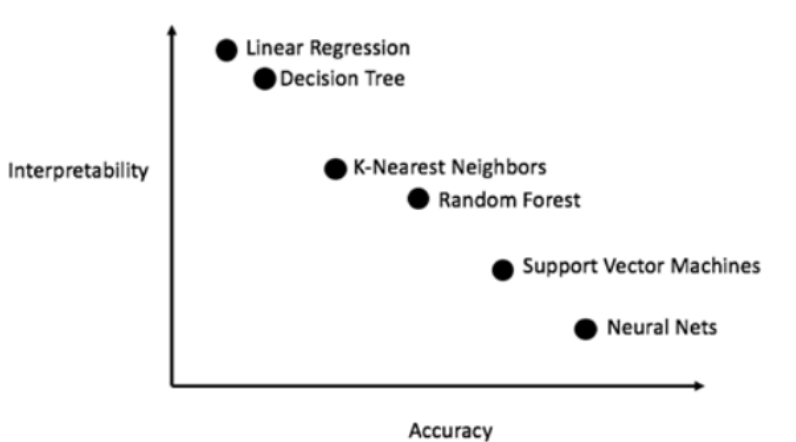

In [735]:
# karena nggak ada yang besar (aneh), coba buang secara logika CIF, ImportDuty, dan Valuta_CIF

# satukan jadi tabel seluruh onehot dulu

df_train_1 = df_train_enc.copy()

df_train_1 = pd.get_dummies(df_train_1, columns=['COuntryOfOrigin','HSCODE'], drop_first=False)

# df_test juga

df_test_1 = df_test.copy()

df_test_1 = pd.get_dummies(df_test_1, columns=['COuntryOfOrigin','HSCODE'], drop_first=False)

df_test.columns

Index(['ID', 'ImportDuty_IDR', 'CIF', 'Valuta_CIF', 'Using_Intermediaries',
       'Using_TradeAgreement', 'COuntryOfOrigin', 'HSCODE'],
      dtype='object')

In [736]:
df_train_1.columns

Index(['ImportDuty_IDR', 'CIF', 'Valuta_CIF', 'Using_Intermediaries',
       'Using_TradeAgreement', 'CustChannel', 'COuntryOfOrigin_AE',
       'COuntryOfOrigin_AF', 'COuntryOfOrigin_AI', 'COuntryOfOrigin_AL',
       ...
       'HSCODE_89', 'HSCODE_90', 'HSCODE_91', 'HSCODE_92', 'HSCODE_93',
       'HSCODE_94', 'HSCODE_95', 'HSCODE_96', 'HSCODE_97', 'HSCODE_98'],
      dtype='object', length=224)

In [737]:
# pilih kolom berdasarkan korelasi terbesar tiap kategori

df_train_2 = df_train_1.iloc[:,3:].copy()

# df_test_1 juga selain CustChannel

df_test_2 = df_test_1.iloc[:,4:].copy()

df_test_2.head()

,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin_AE,COuntryOfOrigin_AL,COuntryOfOrigin_AR,COuntryOfOrigin_AT,COuntryOfOrigin_AU,COuntryOfOrigin_BA,COuntryOfOrigin_BD,COuntryOfOrigin_BE,...,HSCODE_87,HSCODE_89,HSCODE_90,HSCODE_91,HSCODE_92,HSCODE_94,HSCODE_95,HSCODE_96,HSCODE_97,HSCODE_98
0,0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,1,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [738]:
# ubah boolean jadi integer

df_train_2.iloc[:,3:] = df_train_2.iloc[:,2:].astype('int64')

# df_test_2 juga

df_test_2.iloc[:,3:] = df_test_2.iloc[:,1:].astype('int64')

# waktu tes ada yang eror jadi buang manual

df_test_2 = df_test_2.drop('COuntryOfOrigin_PY', axis=1)

df_test_2.dtypes

Using_Intermediaries    int64
Using_TradeAgreement    int64
COuntryOfOrigin_AE       bool
COuntryOfOrigin_AL      int64
COuntryOfOrigin_AR      int64
                        ...  
HSCODE_94               int64
HSCODE_95               int64
HSCODE_96               int64
HSCODE_97               int64
HSCODE_98               int64
Length: 174, dtype: object

In [739]:
# karena ada perbedaan jumlah kolom df_train_2 dan df_test_2 maka perlu disamakan dulu kecuali CustChannel

kolom_cust = df_train_2.columns.intersection(df_test_2.columns).tolist()
kolom_cust.append('CustChannel')

df_train_3 = df_train_2[kolom_cust]
df_train_3.dtypes

Using_Intermediaries    int64
Using_TradeAgreement    int64
COuntryOfOrigin_AE      int64
COuntryOfOrigin_AL      int64
COuntryOfOrigin_AR      int64
                        ...  
HSCODE_95               int64
HSCODE_96               int64
HSCODE_97               int64
HSCODE_98               int64
CustChannel             int64
Length: 175, dtype: object

In [740]:
# # cek csv df_train_3 karena hasilnya ngaco di model

# df_train_3.to_csv('df_train_3.csv', index=False)

In [741]:
# pisahkan target

df_train_fin = df_train_3.copy()

x_train_fin = df_train_fin.drop('CustChannel', axis=1)
y_train_fin = df_train_fin['CustChannel']

# bagi df_train_fin jadi _train dan _test

x_train, x_test, y_train, y_test = train_test_split(x_train_fin, y_train_fin, test_size=0.2, random_state=42)

### random forest

In [742]:
# train dan prediksi

model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

predict_rf = model_rf.predict(x_test)

# cek report
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77188
           1       1.00      1.00      1.00      3753
           2       1.00      1.00      1.00      3560

    accuracy                           1.00     84501
   macro avg       1.00      1.00      1.00     84501
weighted avg       1.00      1.00      1.00     84501



### logistic regression

In [743]:
# train dan prediksi

model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

predict_lr = model_lr.predict(x_test)

# cek report
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77188
           1       1.00      1.00      1.00      3753
           2       1.00      1.00      1.00      3560

    accuracy                           1.00     84501
   macro avg       1.00      1.00      1.00     84501
weighted avg       1.00      1.00      1.00     84501



# evaluation

In [744]:
# karena aneh coba iseng langsung aplikasiin dapet nilai berapa

In [750]:
# coba kfold

folds = KFold(n_splits = 15, shuffle = True, random_state = 100)
scores_kfold = cross_val_score(model_rf, x_train, y_train, scoring='accuracy', cv=folds)
print ("Accuracy K-Fold : ", np.average(scores_kfold))

Accuracy K-Fold :  0.9999970415076477


# submit

In [745]:
# cek df_test_2

df_test_2.head()

,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin_AE,COuntryOfOrigin_AL,COuntryOfOrigin_AR,COuntryOfOrigin_AT,COuntryOfOrigin_AU,COuntryOfOrigin_BA,COuntryOfOrigin_BD,COuntryOfOrigin_BE,...,HSCODE_87,HSCODE_89,HSCODE_90,HSCODE_91,HSCODE_92,HSCODE_94,HSCODE_95,HSCODE_96,HSCODE_97,HSCODE_98
0,0,0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,False,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [746]:
df_test_2

,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin_AE,COuntryOfOrigin_AL,COuntryOfOrigin_AR,COuntryOfOrigin_AT,COuntryOfOrigin_AU,COuntryOfOrigin_BA,COuntryOfOrigin_BD,COuntryOfOrigin_BE,...,HSCODE_87,HSCODE_89,HSCODE_90,HSCODE_91,HSCODE_92,HSCODE_94,HSCODE_95,HSCODE_96,HSCODE_97,HSCODE_98
0,0,0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,False,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39991,0,0,False,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
39992,1,0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39993,1,0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39994,1,0,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [747]:
# prediksi df_test_2

x_test_2 = df_test_2.copy()
y_test_2_pred = model_rf.predict(x_test_2)

# masukan kolom prediksi ke df_test baru hasil copy df_test_1 yang masih ada kolom ID

df_test_3 = df_test_1.copy()
df_test_3['CustChannel'] = y_test_2_pred

In [748]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df_test_3['CustChannel'] = df_test_3['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit = df_test_3[['ID', 'CustChannel']].copy()
df_submit.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [749]:
# simpan ke csv

# df_submit.to_csv('submit_alredho.csv', index=False)

In [792]:
# ngaco banget hasilnya
# coba nggak pakai onehot tapi langsung diencode aja kolom kolom yang categorical

# coba encode bukan onehot

In [793]:
# cek lagi df_train yang sudah diolah

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459962 entries, 0 to 459964
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ImportDuty_IDR        459962 non-null  int64 
 1   CIF                   459962 non-null  int64 
 2   Valuta_CIF            459962 non-null  object
 3   Using_Intermediaries  459962 non-null  int64 
 4   Using_TradeAgreement  459962 non-null  int64 
 5   COuntryOfOrigin       459962 non-null  object
 6   HSCODE                459962 non-null  int64 
 7   CustChannel           459962 non-null  object
dtypes: int64(5), object(3)
memory usage: 31.6+ MB


In [794]:
# cek lagi HSCODE

df_train['HSCODE'].head()

0    8708
1    4016
2    7318
3    8443
4    8708
Name: HSCODE, dtype: int64

In [795]:
# encode semua categorical

df_train_4 = df_train.copy()

cat_data = ['Valuta_CIF', 'COuntryOfOrigin', 'HSCODE']
for x in cat_data:
    df_train_4[x] = le.fit_transform(df_train_4[x]).astype('int64')

df_train_4

,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
0,254458953,170458,19,0,0,110,836,Green
1,1719402722,1237513,19,0,0,78,369,Green
2,662630024,40640204,10,0,0,58,626,Green
3,7443742,1159783,10,1,0,21,746,Green
4,20795848,207958981,8,0,0,77,836,Green
...,...,...,...,...,...,...,...,...
459960,37083755,51228,19,1,0,21,746,Green
459961,142761528,1142097260,8,0,1,58,626,Green
459962,115734026,8941857,10,0,0,58,836,Green
459963,22126778,1361965,10,0,0,58,626,Green


In [796]:
# scale semua yang bukan 0 sampai 1, coba tidak paka standard scaler

scaler = MinMaxScaler()
df_train_4[['ImportDuty_IDR', 'CIF', 'Valuta_CIF', 'COuntryOfOrigin', 'HSCODE']] = scaler.fit_transform(df_train_4[['ImportDuty_IDR', 'CIF', 'Valuta_CIF', 'COuntryOfOrigin', 'HSCODE']])

In [797]:
df_train_4

,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
0,2.611426e-05,1.686401e-13,1.000000,0,0,0.887097,0.899892,Green
1,1.764568e-04,1.224346e-12,1.000000,0,0,0.629032,0.397201,Green
2,6.800357e-05,4.020796e-11,0.526316,0,0,0.467742,0.673843,Green
3,7.638759e-07,1.147443e-12,0.526316,1,0,0.169355,0.803014,Green
4,2.134160e-06,2.057472e-10,0.421053,0,0,0.620968,0.899892,Green
...,...,...,...,...,...,...,...,...
459960,3.805737e-06,5.067821e-14,1.000000,1,0,0.169355,0.803014,Green
459961,1.465111e-05,1.129950e-09,0.421053,0,1,0.467742,0.673843,Green
459962,1.187736e-05,8.846749e-12,0.526316,0,0,0.467742,0.899892,Green
459963,2.270749e-06,1.347475e-12,0.526316,0,0,0.467742,0.673843,Green


In [798]:
# encode CustChannel

df_train_4_enc = df_train_4.copy()

cust_encode = {'Green': 0, 'Yellow': 1, 'Red': 2}
df_train_4_enc['CustChannel'] = df_train_4_enc['CustChannel'].map(cust_encode)

df_train_4_enc

,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
0,2.611426e-05,1.686401e-13,1.000000,0,0,0.887097,0.899892,0
1,1.764568e-04,1.224346e-12,1.000000,0,0,0.629032,0.397201,0
2,6.800357e-05,4.020796e-11,0.526316,0,0,0.467742,0.673843,0
3,7.638759e-07,1.147443e-12,0.526316,1,0,0.169355,0.803014,0
4,2.134160e-06,2.057472e-10,0.421053,0,0,0.620968,0.899892,0
...,...,...,...,...,...,...,...,...
459960,3.805737e-06,5.067821e-14,1.000000,1,0,0.169355,0.803014,0
459961,1.465111e-05,1.129950e-09,0.421053,0,1,0.467742,0.673843,0
459962,1.187736e-05,8.846749e-12,0.526316,0,0,0.467742,0.899892,0
459963,2.270749e-06,1.347475e-12,0.526316,0,0,0.467742,0.673843,0


In [799]:
# coba cek korelasi

# compute correlation
df_train_4_enc_corr = df_train_4_enc.corr('pearson')

# generate heatmap correlation
df_train_4_enc_corr.style.background_gradient(cmap='coolwarm')

,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
ImportDuty_IDR,1.000000,0.058066,0.017469,0.024921,0.010198,-0.001556,-0.074745,0.010435
CIF,0.058066,1.000000,-0.028995,0.012452,0.003148,0.006485,-0.017452,-0.001896
Valuta_CIF,0.017469,-0.028995,1.000000,0.147851,0.019092,0.278005,0.036927,0.096265
Using_Intermediaries,0.024921,0.012452,0.147851,1.000000,-0.113027,-0.038966,-0.096515,0.206231
Using_TradeAgreement,0.010198,0.003148,0.019092,-0.113027,1.000000,-0.112943,-0.029597,0.003965
COuntryOfOrigin,-0.001556,0.006485,0.278005,-0.038966,-0.112943,1.000000,0.076994,-0.086241
HSCODE,-0.074745,-0.017452,0.036927,-0.096515,-0.029597,0.076994,1.000000,-0.017398
CustChannel,0.010435,-0.001896,0.096265,0.206231,0.003965,-0.086241,-0.017398,1.000000


In [800]:
# sudah scaling tapi korelasi masih jelek??

# coba tidak usah encode, tetap pakai onehot, tapi scale ImportDuty saja karena yang IDR cuma itu

In [132]:
# copy dulu ke tabel sementara
df_train_enc2 = df_train.copy()

# encode

# df_train_enc['CustChannel'] = pd.factorize(df_train_enc['CustChannel'])[0] # gabisa karena ini cuma untuk kolom dengan 2 integer

# le = LabelEncoder()
# df_train_enc['CustChannel'] = le.fit_transform(df_train_enc['CustChannel']).astype('int64') # kalau pake ini jadi nggak tau misahinnya berdasar apa

# pake library aja

cust_encode = {'Green': 0, 'Yellow': 1, 'Red': 2}
df_train_enc2['CustChannel'] = df_train_enc2['CustChannel'].map(cust_encode)

In [133]:
# satukan jadi tabel seluruh onehot dulu

df_train_5 = df_train_enc2.copy()

df_train_5 = pd.get_dummies(df_train_5, columns=['COuntryOfOrigin','HSCODE'], drop_first=False)

# df_test juga

df_test_5 = df_test.copy()

df_test_5 = pd.get_dummies(df_test_5, columns=['COuntryOfOrigin','HSCODE'], drop_first=False)

In [134]:
df_train_5.head()

,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,CustChannel,COuntryOfOrigin_AE,COuntryOfOrigin_AF,COuntryOfOrigin_AI,COuntryOfOrigin_AL,...,HSCODE_89,HSCODE_90,HSCODE_91,HSCODE_92,HSCODE_93,HSCODE_94,HSCODE_95,HSCODE_96,HSCODE_97,HSCODE_98
0,254458953,170458,USD,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1719402722,1237513,USD,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,662630024,40640204,JPY,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,7443742,1159783,JPY,1,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20795848,207958981,IDR,0,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [135]:
# buang kolom CIF dan Valuta_CIF
df_train_5.drop({'CIF', 'Valuta_CIF'}, axis=1, inplace=True)
df_test_5.drop({'CIF', 'Valuta_CIF'}, axis=1, inplace=True)

In [136]:
# scale ImportDuty

# scaler = MinMaxScaler()
# df_train_5[['ImportDuty_IDR']] = scaler.fit_transform(df_train_5[['ImportDuty_IDR']]) # pakai ini dapat nilai 0.37

# df_train_5.head()

# ada outlier jadi pakai standard scaler

from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
df_test_5['ImportDuty_IDR'] = scaler2.fit_transform(df_test_5[['ImportDuty_IDR']]) # pakai ini dapat nilai 0.40

In [137]:
# ubah boolean jadi integer

df_train_5.iloc[:,4:] = df_train_5.iloc[:,4:].astype('int64')
df_test_5.iloc[:,4:] = df_test_5.iloc[:,4:].astype('int64')

df_test_5.head()

,ID,ImportDuty_IDR,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin_AE,COuntryOfOrigin_AL,COuntryOfOrigin_AR,COuntryOfOrigin_AT,COuntryOfOrigin_AU,COuntryOfOrigin_BA,...,HSCODE_87,HSCODE_89,HSCODE_90,HSCODE_91,HSCODE_92,HSCODE_94,HSCODE_95,HSCODE_96,HSCODE_97,HSCODE_98
0,C1,0.041746,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C2,-0.098078,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,C3,-0.086381,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C4,-0.041597,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,C5,-0.090014,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
# samakan kolom

kolom_cust5 = df_train_5.columns.intersection(df_test_5.columns).tolist()
kolom_cust5.append('CustChannel')

df_train_5 = df_train_5[kolom_cust5]
df_train_5.dtypes

ImportDuty_IDR          int64
Using_Intermediaries    int64
Using_TradeAgreement    int64
COuntryOfOrigin_AE      int64
COuntryOfOrigin_AL      int64
                        ...  
HSCODE_95               int64
HSCODE_96               int64
HSCODE_97               int64
HSCODE_98               int64
CustChannel             int64
Length: 176, dtype: object

In [143]:
# pisahkan target

x_train5 = df_train_5.drop('CustChannel', axis=1)
y_train5 = df_train_5['CustChannel']

x_train, x_test, y_train, y_test = train_test_split(x_train5, y_train5, test_size=0.2, random_state=42)

In [142]:
model5_rf = RandomForestClassifier()
model5_rf.fit(x_train, y_train)

predict5_rf = model5_rf.predict(x_test)

# cek report
print(classification_report(y_test, predict5_rf))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     84076
           1       0.24      0.23      0.24      3849
           2       0.36      0.34      0.35      4068

    accuracy                           0.89     91993
   macro avg       0.52      0.51      0.51     91993
weighted avg       0.89      0.89      0.89     91993



In [82]:
# prediksi df_test_5

x_test_5 = df_test_5.drop({'ID', 'COuntryOfOrigin_PY'}, axis=1).copy()
y_test_5_pred = model5_rf.predict(x_test_5)

# masukan kolom prediksi ke df_test baru hasil copy df_test_1 yang masih ada kolom ID

df_test_5['CustChannel'] = y_test_5_pred

In [83]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df_test_5['CustChannel'] = df_test_5['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit2 = df_test_5[['ID', 'CustChannel']].copy()
df_submit2.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [84]:
df_submit2.to_csv('submit3_alredho.csv', index=False)

In [ ]:
# mau validation tapi komputer nggak kuat, di colab juga jalan 10 menit nggak selesai
# coba lanjut tuning karena kayaknya arahnya udah bener

In [102]:
# reduction sisi statistik karea data banyak

X5_new = SelectKBest(chi2, k=20).fit_transform(x_train5, y_train5)
X5_new.shape

(459962, 20)

In [104]:
y_train6 = df_train_5['CustChannel']

x_train6, x_test6, y_train6, y_test6 = train_test_split(X5_new, y_train6, test_size=0.2, random_state=42)

model6_rf = RandomForestClassifier()
model6_rf.fit(x_train6, y_train6)

predict6_rf = model6_rf.predict(x_test6)

# cek report
print(classification_report(y_test6, predict6_rf))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     84076
           1       0.18      0.17      0.18      3849
           2       0.30      0.29      0.29      4068

    accuracy                           0.88     91993
   macro avg       0.47      0.47      0.47     91993
weighted avg       0.87      0.88      0.88     91993



In [110]:
# reduction statistic justru menurunkan skor
# coba dari sisi model

model7_rf = model5_rf.fit(x_train5, y_train5)
feature_select = SelectFromModel(model7_rf, prefit=True)
x7_new = feature_select.transform(x_train5)
x7_new.shape

(459962, 10)

In [112]:
y_train7 = df_train_5['CustChannel']

x_train7, x_test7, y_train7, y_test7 = train_test_split(x7_new, y_train7, test_size=0.2, random_state=42)

model7_rf = RandomForestClassifier()
model7_rf.fit(x_train7, y_train7)

predict7_rf = model7_rf.predict(x_test7)

# cek report
print(classification_report(y_test7, predict7_rf))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     84076
           1       0.17      0.16      0.17      3849
           2       0.28      0.28      0.28      4068

    accuracy                           0.88     91993
   macro avg       0.46      0.46      0.46     91993
weighted avg       0.87      0.88      0.87     91993



<Axes: >

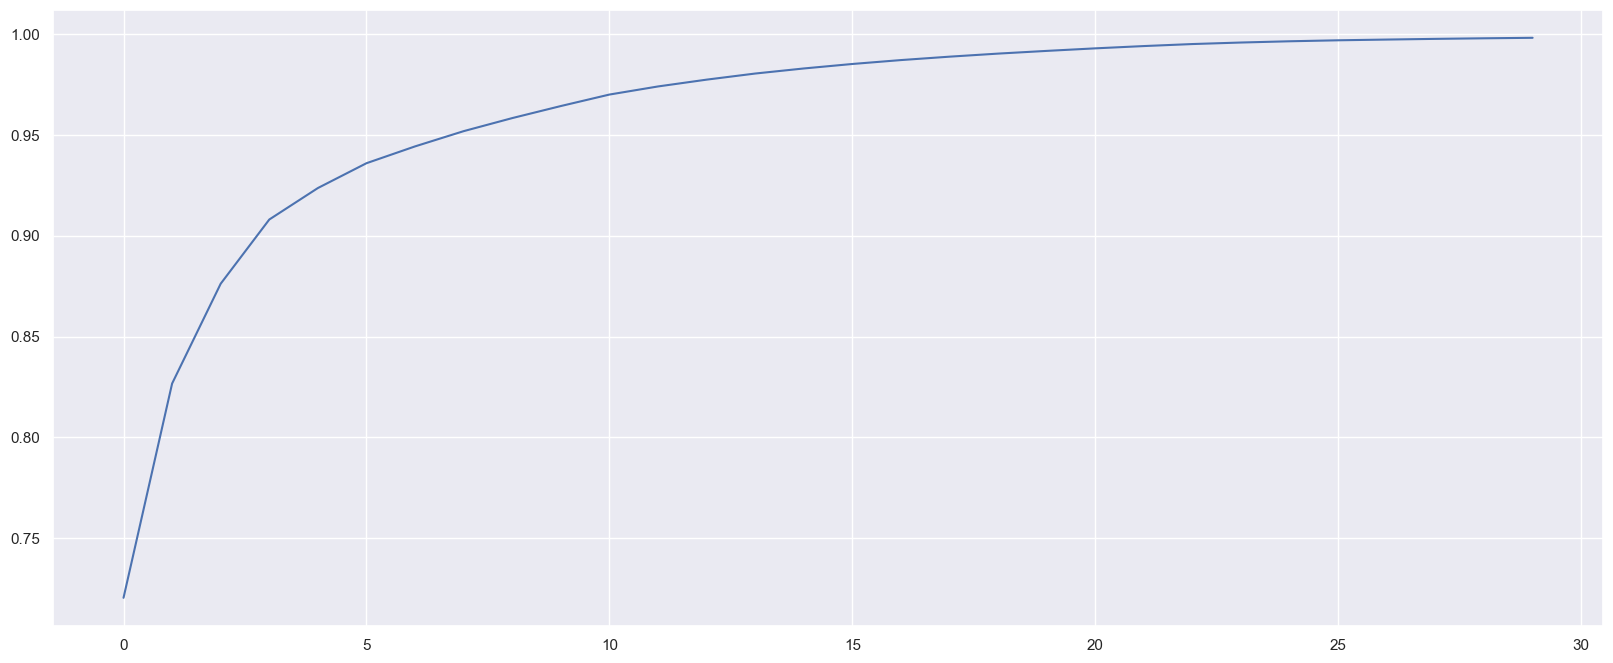

In [114]:
# malah makin turun
# coba pca

norm = Normalizer()
x8_norm = norm.fit_transform(x_train5)

pca = PCA(n_components=30)
pca.fit(x8_norm)
sns.lineplot(pca.explained_variance_ratio_.cumsum())

In [115]:
# coba pakai angka 18

pca = PCA(n_components=18)
x8_new = pca.fit_transform(x_train5)
print(x8_new.shape)

(459962, 18)


In [116]:
y_train8 = df_train_5['CustChannel']

x_train8, x_test8, y_train8, y_test8 = train_test_split(x8_new, y_train8, test_size=0.2, random_state=42)

model8_rf = RandomForestClassifier()
model8_rf.fit(x_train8, y_train8)

predict8_rf = model8_rf.predict(x_test8)

# cek report
print(classification_report(y_test8, predict8_rf)) # kelihatan naik tapi skor malah turun ke 31

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     84076
           1       0.27      0.17      0.21      3849
           2       0.43      0.32      0.36      4068

    accuracy                           0.90     91993
   macro avg       0.54      0.48      0.51     91993
weighted avg       0.89      0.90      0.89     91993



In [138]:
# prediksi df_test_8

x_test_8 = df_test_5.drop({'ID', 'COuntryOfOrigin_PY'}, axis=1).copy()

pca = PCA(n_components=18)
x8_fin = pca.fit_transform(x_test_8)
print(x8_fin.shape)

y_test_8_pred = model8_rf.predict(x8_fin)

# masukan kolom prediksi ke df_test baru hasil copy df_test_1 yang masih ada kolom ID

df_test_8['CustChannel'] = y_test_8_pred

(39996, 18)


In [140]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df_test_8['CustChannel'] = df_test_8['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit4 = df_test_8[['ID', 'CustChannel']].copy()
df_submit4.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [141]:
df_submit4.to_csv('submit4_alredho.csv', index=False)

In [186]:
# coba ganti model yang skor 40 ke knn
# ganti dari onehot jadi label karena kalau knn pakai onehot kelamaan

df_train_9 = df_train_enc2.copy()
df_test_9 = df_test.copy()

# buang kolom CIF dan Valuta_CIF
df_train_9.drop({'CIF', 'Valuta_CIF'}, axis=1, inplace=True)
df_test_9.drop({'CIF', 'Valuta_CIF'}, axis=1, inplace=True)

# scale import_duty
# scaler2 = StandardScaler()
# df_test_5['ImportDuty_IDR'] = scaler2.fit_transform(df_test_5[['ImportDuty_IDR']]) # pakai ini dapat nilai 0.40
# scale semua yang bukan 0 sampai 1, coba tidak paka standard scaler
scaler = MinMaxScaler()
df_train_9[['ImportDuty_IDR']] = scaler.fit_transform(df_train_9[['ImportDuty_IDR']])
df_test_9[['ImportDuty_IDR']] = scaler.fit_transform(df_test_9[['ImportDuty_IDR']])

# label kolom categorical lainnya
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_train_9['COuntryOfOrigin'] = le.fit_transform(df_train_9['COuntryOfOrigin'])
df_test_9['COuntryOfOrigin'] = le.fit_transform(df_test_9['COuntryOfOrigin'])

df_train_9.head()

,ImportDuty_IDR,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
0,2.611426e-05,0,0,110,87,0
1,1.764568e-04,0,0,78,40,0
2,6.800357e-05,0,0,58,73,0
3,7.638759e-07,1,0,21,84,0
4,2.134160e-06,0,0,77,87,0


In [189]:
# model knn

x_train9 = df_train_9.drop('CustChannel', axis=1)
y_train9 = df_train_9['CustChannel']
x_train9, x_test9, y_train9, y_test9 = train_test_split(x_train9, y_train9, test_size=0.2, random_state=42)

model9_knn = KNeighborsClassifier(n_neighbors=3)
model9_knn.fit(x_train9, y_train9)

predict9_knn = model9_knn.predict(x_test9)
print(classification_report(y_test9, predict9_knn)) # skor 36.9

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     84076
           1       0.31      0.15      0.20      3849
           2       0.52      0.28      0.37      4068

    accuracy                           0.91     91993
   macro avg       0.59      0.47      0.51     91993
weighted avg       0.89      0.91      0.90     91993



In [191]:
# prediksi df_test_9

x_test_9 = df_test_9.drop('ID', axis=1).copy()
y_test_9_pred = model9_knn.predict(x_test_9)

# masukan kolom prediksi ke df_test baru hasil copy df_test_1 yang masih ada kolom ID

df_test_9['CustChannel'] = y_test_9_pred

In [192]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df_test_9['CustChannel'] = df_test_9['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit5 = df_test_9[['ID', 'CustChannel']].copy()
df_test_9.head()

,ID,ImportDuty_IDR,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
0,C1,0.001132,0,0,60,02,Green
1,C2,0.000010,0,0,43,40,Green
2,C3,0.000104,0,0,79,73,Green
3,C4,0.000463,1,1,12,87,Green
4,C5,0.000075,1,0,43,39,Green


In [165]:
df_submit5.to_csv('submit5_alredho.csv', index=False)

In [219]:
# baru dapat ide kalau HSCODE selain kategori bisa jadi pengaruh langsung dari barangnya
# perlu diambil kode belakang juga, buat dataset baru sekalian

# import data

df2_test = pd.read_csv('./data_testing.csv', sep=';')
df2_train = pd.read_csv('./data_training.csv', sep=';')

# drop

df2_train.drop({'DocsDate', 'CIF', 'Valuta_CIF'}, axis=1, inplace=True)
df2_test.drop({'DocsDate', 'CIF', 'Valuta_CIF'}, axis=1, inplace=True)

# trim whitespace

df2_train = df2_train.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df2_test = df2_test.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# drop na

df2_train.dropna(inplace=True)

# # betulkan cif

# df2_train['CIF'] = df2_train['CIF'].str.replace(',', '')
# df2_train['CIF'] = df2_train['CIF'].astype('float').astype('int64')

# df2_test['CIF'] = df2_test['CIF'].astype('str').str.replace(',', '')
# df2_test['CIF'] = df2_test['CIF'].astype('float').astype('int64')

# ambil HSCODE depan

df2_train['HSDEPAN'] = df2_train['HSCODE'].astype('str').str.slice(0, -2)
df2_test['HSDEPAN'] = df2_test['HSCODE'].astype('str').str.slice(0, -2)

# ambil HSCODE belakang

df2_train['HSBELAKANG'] = df2_train['HSCODE'].astype('str').str[-2:]
df2_test['HSBELAKANG'] = df2_test['HSCODE'].astype('str').str[-2:]

# drop HSCODE
df2_train.drop({'HSCODE'}, axis=1, inplace=True)
df2_test.drop({'HSCODE'}, axis=1, inplace=True)

df2_train.head()

,ImportDuty_IDR,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,CustChannel,HSDEPAN,HSBELAKANG
0,254458953,0,0,TH,Green,87,08
1,1719402722,0,0,MY,Green,40,16
2,662630024,0,0,JP,Green,73,18
3,7443742,1,0,CN,Green,84,43
4,20795848,0,0,MX,Green,87,08


In [220]:
# scaling
scaler = MinMaxScaler()
df2_train[['ImportDuty_IDR']] = scaler.fit_transform(df2_train[['ImportDuty_IDR']])
df2_test[['ImportDuty_IDR']] = scaler.fit_transform(df2_test[['ImportDuty_IDR']])

# encoding
# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2_train['COuntryOfOrigin'] = le.fit_transform(df2_train['COuntryOfOrigin'])
df2_test['COuntryOfOrigin'] = le.fit_transform(df2_test['COuntryOfOrigin'])

cust_encode = {'Green': 0, 'Yellow': 1, 'Red': 2}
df2_train['CustChannel'] = df2_train['CustChannel'].map(cust_encode)

df2_train.dtypes

ImportDuty_IDR          float64
Using_Intermediaries      int64
Using_TradeAgreement      int64
COuntryOfOrigin           int32
CustChannel               int64
HSDEPAN                  object
HSBELAKANG               object
dtype: object

In [221]:
# model knn

x_train10 = df2_train.drop('CustChannel', axis=1)
y_train10 = df2_train['CustChannel']
x_train10, x_test10, y_train10, y_test10 = train_test_split(x_train10, y_train10, test_size=0.2, random_state=42)

model10_knn = KNeighborsClassifier(n_neighbors=3)
model10_knn.fit(x_train10, y_train10)

predict10_knn = model10_knn.predict(x_test10)
print(classification_report(y_test10, predict10_knn))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     84076
           1       0.43      0.26      0.32      3849
           2       0.59      0.37      0.45      4068

    accuracy                           0.92     91993
   macro avg       0.65      0.54      0.58     91993
weighted avg       0.91      0.92      0.91     91993



In [225]:
# prediksi df_test_10
df_test_10 = df2_test.copy()

x_test_10 = df_test_10.drop('ID', axis=1).copy()
y_test_10_pred = model10_knn.predict(x_test_10)

# masukan kolom prediksi ke df_test baru hasil copy df_test_1 yang masih ada kolom ID

df_test_10['CustChannel'] = y_test_10_pred

In [226]:
df_test_10

,ID,ImportDuty_IDR,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSDEPAN,HSBELAKANG,CustChannel
0,C1,0.001132,0,0,60,2,06,0
1,C2,0.000010,0,0,43,40,16,0
2,C3,0.000104,0,0,79,73,18,0
3,C4,0.000463,1,1,12,87,08,0
4,C5,0.000075,1,0,43,39,26,0
...,...,...,...,...,...,...,...,...
39991,C39992,0.000132,0,0,79,87,08,0
39992,C39993,0.000001,1,0,81,73,21,0
39993,C39994,0.000007,1,0,43,73,18,0
39994,C39995,0.000004,1,0,84,73,18,0


In [227]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df_test_10['CustChannel'] = df_test_10['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit6 = df_test_10[['ID', 'CustChannel']].copy()
df_submit6.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [228]:
df_submit6.to_csv('submit6_alredho.csv', index=False)

In [232]:
# tes random forest lagi

x_train11 = df2_train.drop('CustChannel', axis=1)
y_train11 = df2_train['CustChannel']
x_train11, x_test11, y_train11, y_test11 = train_test_split(x_train11, y_train11, test_size=0.2, random_state=42)

model11_rf = RandomForestClassifier()
model11_rf.fit(x_train11, y_train11)

predict11_rf = model11_rf.predict(x_test11)
print(classification_report(y_test11, predict11_rf))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     84076
           1       0.41      0.25      0.31      3849
           2       0.55      0.36      0.44      4068

    accuracy                           0.92     91993
   macro avg       0.64      0.53      0.57     91993
weighted avg       0.90      0.92      0.91     91993



In [243]:
# coba cek hubungan semua

# import data

df3_test = pd.read_csv('./data_testing.csv', sep=';')
df3_train = pd.read_csv('./data_training.csv', sep=';')

# drop

df3_train.drop('DocsDate', axis=1, inplace=True)
df3_test.drop('DocsDate', axis=1, inplace=True)

# trim whitespace

df3_train = df3_train.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df3_test = df3_test.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# drop na

df3_train.dropna(inplace=True)

# betulkan cif

df3_train['CIF'] = df3_train['CIF'].str.replace(',', '')
df3_train['CIF'] = df3_train['CIF'].astype('float').astype('int64')

df3_test['CIF'] = df3_test['CIF'].astype('str').str.replace(',', '')
df3_test['CIF'] = df3_test['CIF'].astype('float').astype('int64')

# betulkan HSCODE

df3_train['HSCODE'] = df3_train['HSCODE'].astype('str').str.zfill(4)
df3_test['HSCODE'] = df3_test['HSCODE'].astype('str').str.zfill(4)

# ambil HSCODE depan

df3_train['HSDEPAN'] = df3_train['HSCODE'].astype('str').str.slice(0, -2)
df3_test['HSDEPAN'] = df3_test['HSCODE'].astype('str').str.slice(0, -2)

# ambil HSCODE belakang

df3_train['HSBELAKANG'] = df3_train['HSCODE'].astype('str').str[-2:]
df3_test['HSBELAKANG'] = df3_test['HSCODE'].astype('str').str[-2:]

# drop HSCODE
df3_train.drop({'HSCODE'}, axis=1, inplace=True)
df3_test.drop({'HSCODE'}, axis=1, inplace=True)

df3_train.head()

,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,CustChannel,HSDEPAN,HSBELAKANG
0,254458953,170458,USD,0,0,TH,Green,87,08
1,1719402722,1237513,USD,0,0,MY,Green,40,16
2,662630024,40640204,JPY,0,0,JP,Green,73,18
3,7443742,1159783,JPY,1,0,CN,Green,84,43
4,20795848,207958981,IDR,0,0,MX,Green,87,08


In [244]:
# scaling
scaler = MinMaxScaler()
df3_train[['ImportDuty_IDR']] = scaler.fit_transform(df3_train[['ImportDuty_IDR']])
df3_test[['ImportDuty_IDR']] = scaler.fit_transform(df3_test[['ImportDuty_IDR']])

# encoding
# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3_train['COuntryOfOrigin'] = le.fit_transform(df3_train['COuntryOfOrigin'])
df3_test['COuntryOfOrigin'] = le.fit_transform(df3_test['COuntryOfOrigin'])

df3_train['Valuta_CIF'] = le.fit_transform(df3_train['Valuta_CIF'])
df3_test['Valuta_CIF'] = le.fit_transform(df3_test['Valuta_CIF'])

df3_train['HSBELAKANG'] = le.fit_transform(df3_train['HSBELAKANG'])
df3_test['HSBELAKANG'] = le.fit_transform(df3_test['HSBELAKANG'])

df3_train['HSDEPAN'] = le.fit_transform(df3_train['HSDEPAN'])
df3_test['HSDEPAN'] = le.fit_transform(df3_test['HSDEPAN'])

cust_encode = {'Green': 0, 'Yellow': 1, 'Red': 2}
df3_train['CustChannel'] = df3_train['CustChannel'].map(cust_encode)

df3_train.dtypes

ImportDuty_IDR          float64
CIF                       int64
Valuta_CIF                int32
Using_Intermediaries      int64
Using_TradeAgreement      int64
COuntryOfOrigin           int32
CustChannel               int64
HSDEPAN                   int32
HSBELAKANG                int32
dtype: object

In [245]:
# buat tabel korelasi pearson

# compute correlation
df3_train_corr = df3_train.corr('pearson')

# generate heatmap correlation
df3_train_corr.style.background_gradient(cmap='coolwarm')

,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,CustChannel,HSDEPAN,HSBELAKANG
ImportDuty_IDR,1.000000,0.058066,0.017469,0.024921,0.010198,-0.001556,0.010435,-0.078773,-0.027038
CIF,0.058066,1.000000,-0.028995,0.012452,0.003148,0.006485,-0.001896,-0.017285,-0.007761
Valuta_CIF,0.017469,-0.028995,1.000000,0.147851,0.019092,0.278005,0.096265,0.043630,0.000644
Using_Intermediaries,0.024921,0.012452,0.147851,1.000000,-0.113027,-0.038966,0.206231,-0.073773,0.067908
Using_TradeAgreement,0.010198,0.003148,0.019092,-0.113027,1.000000,-0.112943,0.003965,-0.017327,-0.065134
COuntryOfOrigin,-0.001556,0.006485,0.278005,-0.038966,-0.112943,1.000000,-0.086241,0.081841,-0.010954
CustChannel,0.010435,-0.001896,0.096265,0.206231,0.003965,-0.086241,1.000000,-0.025011,0.024351
HSDEPAN,-0.078773,-0.017285,0.043630,-0.073773,-0.017327,0.081841,-0.025011,1.000000,0.294272
HSBELAKANG,-0.027038,-0.007761,0.000644,0.067908,-0.065134,-0.010954,0.024351,0.294272,1.000000


# coba categorical pakai dictionary aja

In [ ]:
# kayaknya daritadi salah pendekatan data prep soalnya hasil model sudah diadjust pun nggak jauh beda
# coba pakai dictionary untuk data yang aslinya categoric
# nggak usah pilih pilih kolom lagi, tes dulu ambil semua nanti skornya berapa

In [3]:
df4_test = pd.read_csv('./data_testing.csv', sep=';')
df4_train = pd.read_csv('./data_training.csv', sep=';')

In [4]:
# samakan format keduanya dulu

df4_train['CIF'] = df4_train['CIF'].str.replace(',', '.')
df4_train['CIF'] = df4_train['CIF'].astype('float').astype('int64')

df4_train['HSCODE'] = df4_train['HSCODE'].astype('str')

In [5]:
df4_test['HSCODE'] = df4_test['HSCODE'].astype('str')

In [6]:
# buang NA di df4_train

df4_train.dropna(inplace=True)
df4_train.isna().sum()

DocsDate                0
ImportDuty_IDR          0
CIF                     0
Valuta_CIF              0
Using_Intermediaries    0
Using_TradeAgreement    0
COuntryOfOrigin         0
HSCODE                  0
CustChannel             0
dtype: int64

In [7]:
# isi HSCODE supaya formatnya 4 digit

df4_train['HSCODE'] = df4_train['HSCODE'].str.zfill(4)
df4_test['HSCODE'] = df4_test['HSCODE'].str.zfill(4)

In [8]:
# encode CustChannel

cust_encode4 = {'Green': 0, 'Yellow': 1, 'Red': 2}
df4_train['CustChannel'] = df4_train['CustChannel'].map(cust_encode4)

In [9]:
df4_train.describe()

,ImportDuty_IDR,CIF,Using_Intermediaries,Using_TradeAgreement,CustChannel
count,4.599620e+05,4.599620e+05,459962.000000,459962.000000,459962.000000
mean,1.982991e+09,1.311702e+09,0.567666,0.104404,0.129893
std,2.801470e+10,3.121364e+10,0.495401,0.305785,0.448774
min,5.040000e+02,5.000000e+00,0.000000,0.000000,0.000000
25%,2.288351e+07,5.147500e+04,0.000000,0.000000,0.000000
50%,1.063732e+08,4.896490e+05,1.000000,0.000000,0.000000
75%,5.382890e+08,6.697744e+06,1.000000,0.000000,0.000000
max,9.744041e+12,1.010750e+13,1.000000,1.000000,2.000000


In [10]:
df4_train.describe(include='object')

,DocsDate,Valuta_CIF,COuntryOfOrigin,HSCODE
count,459962,459962,459962,459962
unique,307,20,125,930
top,04/06/2022,USD,JP,7318
freq,11599,248505,167355,74569


In [11]:
# buat dictionary untuk gabungan COuntryOfOrigin

dict_coo = pd.concat([df4_train[['COuntryOfOrigin']], df4_test[['COuntryOfOrigin']]]).drop_duplicates()
dict_coo = dict_coo.reset_index()
dict_coo.drop('index', axis=1, inplace=True)
dict_coo['code'] = range(1, len(dict_coo) + 1)
dict_coo = dict(zip(dict_coo['COuntryOfOrigin'], dict_coo['code']))

In [12]:
# encode COuntryOfOrigin

df4_train['COuntryOfOrigin'] = df4_train['COuntryOfOrigin'].map(dict_coo)
df4_test['COuntryOfOrigin'] = df4_test['COuntryOfOrigin'].map(dict_coo)

In [13]:
# buat dictionary untuk gabungan Valuta_CIF

dict_val = pd.concat([df4_train[['Valuta_CIF']], df4_test[['Valuta_CIF']]]).drop_duplicates()
dict_val = dict_val.reset_index()
dict_val.drop('index', axis=1, inplace=True)
dict_val['code'] = range(1, len(dict_val) + 1)
dict_val = dict(zip(dict_val['Valuta_CIF'], dict_val['code']))

In [14]:
# encode Valuta_CIF

df4_train['Valuta_CIF'] = df4_train['Valuta_CIF'].map(dict_val)
df4_test['Valuta_CIF'] = df4_test['Valuta_CIF'].map(dict_val)

In [15]:
# pisahkan HSCODE jadi kategori dan jenis

df4_train['HSDEPAN'] = df4_train['HSCODE'].str.slice(0, -2)
df4_test['HSDEPAN'] = df4_test['HSCODE'].str.slice(0, -2)

df4_train['HSBELAKANG'] = df4_train['HSCODE'].str[-2:]
df4_test['HSBELAKANG'] = df4_test['HSCODE'].str[-2:]

In [16]:
# buat dictionary untuk gabungan HSCODE dan depan belakang

dict_hs = pd.concat([df4_train[['HSCODE']], df4_test[['HSCODE']]]).drop_duplicates()
dict_hs = dict_hs.reset_index()
dict_hs.drop('index', axis=1, inplace=True)
dict_hs['code'] = range(1, len(dict_hs) + 1)
dict_hs = dict(zip(dict_hs['HSCODE'], dict_hs['code']))

dict_hsd = pd.concat([df4_train[['HSDEPAN']], df4_test[['HSDEPAN']]]).drop_duplicates()
dict_hsd = dict_hsd.reset_index()
dict_hsd.drop('index', axis=1, inplace=True)
dict_hsd['code'] = range(1, len(dict_hsd) + 1)
dict_hsd = dict(zip(dict_hsd['HSDEPAN'], dict_hsd['code']))

dict_hsb = pd.concat([df4_train[['HSBELAKANG']], df4_test[['HSBELAKANG']]]).drop_duplicates()
dict_hsb = dict_hsb.reset_index()
dict_hsb.drop('index', axis=1, inplace=True)
dict_hsb['code'] = range(1, len(dict_hsb) + 1)
dict_hsb = dict(zip(dict_hsb['HSBELAKANG'], dict_hsb['code']))

In [17]:
# encode semua HS

df4_train['HSCODE'] = df4_train['HSCODE'].map(dict_hs)
df4_test['HSCODE'] = df4_test['HSCODE'].map(dict_hs)

df4_train['HSDEPAN'] = df4_train['HSDEPAN'].map(dict_hsd)
df4_test['HSDEPAN'] = df4_test['HSDEPAN'].map(dict_hsd)

df4_train['HSBELAKANG'] = df4_train['HSBELAKANG'].map(dict_hsb)
df4_test['HSBELAKANG'] = df4_test['HSBELAKANG'].map(dict_hsb)

In [18]:
# betulkan DocsDate

df4_train['DocsDate'] = pd.to_datetime(df4_train['DocsDate'], format='%d/%m/%Y')
df4_test['DocsDate'] = pd.to_datetime(df4_test['DocsDate'], format='%d/%m/%Y')

In [19]:
# scaling ImpotDuty dan CIF

scaler = MinMaxScaler()
df4_train[['ImportDuty_IDR', 'CIF']] = scaler.fit_transform(df4_train[['ImportDuty_IDR', 'CIF']])
df4_test[['ImportDuty_IDR', 'CIF']] = scaler.fit_transform(df4_test[['ImportDuty_IDR', 'CIF']])

In [20]:
# pisahkan tanggal dan bulan

df4_train['tanggal'] = pd.to_datetime(df4_train['DocsDate']).dt.month
df4_test['tanggal'] = pd.to_datetime(df4_test['DocsDate']).dt.month

df4_train['bulan'] = pd.to_datetime(df4_train['DocsDate']).dt.day
df4_test['bulan'] = pd.to_datetime(df4_test['DocsDate']).dt.day

df4_train.drop('DocsDate', axis=1, inplace=True)
df4_test.drop('DocsDate', axis=1, inplace=True)

In [21]:
# cek dulu hasilnya

df4_train.head()

,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel,HSDEPAN,HSBELAKANG,tanggal,bulan
0,2.611426e-05,1.686401e-08,1,0,0,1,1,0,1,1,10,9
1,1.764568e-04,1.224346e-07,1,0,0,2,2,0,2,2,5,2
2,6.800357e-05,4.020796e-06,2,0,0,3,3,0,3,3,4,2
3,7.638759e-07,1.147443e-07,2,1,0,4,4,0,4,4,5,8
4,2.134160e-06,2.057472e-05,3,0,0,5,1,0,1,1,8,2


In [22]:
# random forest

x12_train = df4_train.drop('CustChannel', axis=1)
y12_train = df4_train['CustChannel']
x12_train, x12_test, y12_train, y12_test = train_test_split(x12_train, y12_train, test_size=0.2, random_state=42)

model12_rf = RandomForestClassifier()
model12_rf.fit(x12_train, y12_train)

predict12_rf = model12_rf.predict(x12_test)
print(classification_report(y12_test, predict12_rf)) # dapet skor 78 waktu CIF belum titik

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     84076
           1       0.86      0.64      0.74      3849
           2       0.89      0.65      0.75      4068

    accuracy                           0.96     91993
   macro avg       0.91      0.76      0.82     91993
weighted avg       0.96      0.96      0.96     91993



In [29]:
# prediksi df12_test
df12_test = df4_test.copy()

x12_test = df12_test.drop('ID', axis=1).copy()
y12_test = model12_rf.predict(x12_test)

# masukan kolom prediksi ke df_test baru hasil copy df_test yang masih ada kolom ID

df12_test['CustChannel'] = y12_test

In [270]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df12_test['CustChannel'] = df12_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit7 = df12_test[['ID', 'CustChannel']].copy()
df_submit7.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [271]:
df_submit7.to_csv('submit7_alredho.csv', index=False)

In [272]:
# berarti bener sebelumnya memang salah pendekatan data prep
# coba tuning model yang ini dulu

## tuning 

In [274]:
# tuning statistik

x12_stat = SelectKBest(chi2, k=20).fit_transform(x12_train, y12_train)
x12_stat.shape

(367969, 11)

In [278]:
y13_train = df4_train['CustChannel']

x13_train, x13_test, y13_train, y13_test = train_test_split(x12_stat, y12_train, test_size=0.2, random_state=42)

model13_rf = RandomForestClassifier()
model13_rf.fit(x13_train, y13_train)

predict13_rf = model13_rf.predict(x13_test)

# cek report
print(classification_report(y13_test, predict13_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     67237
           1       0.85      0.64      0.73      3000
           2       0.88      0.63      0.74      3357

    accuracy                           0.96     73594
   macro avg       0.90      0.75      0.81     73594
weighted avg       0.96      0.96      0.96     73594



In [280]:
# malah turun, coba tuning model

model12_fit = model12_rf.fit(x12_train, y12_train)
feature_select = SelectFromModel(model12_fit, prefit=True)
x14_mod = feature_select.transform(x12_train)
x14_mod.shape

(367969, 5)

In [281]:
y14_train = df4_train['CustChannel']

x14_train, x14_test, y14_train, y14_test = train_test_split(x14_mod, y12_train, test_size=0.2, random_state=42)

model14_rf = RandomForestClassifier()
model14_rf.fit(x14_train, y14_train)

predict14_rf = model14_rf.predict(x14_test)

# cek report
print(classification_report(y14_test, predict14_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     67237
           1       0.73      0.48      0.58      3000
           2       0.78      0.49      0.60      3357

    accuracy                           0.94     73594
   macro avg       0.82      0.65      0.72     73594
weighted avg       0.94      0.94      0.94     73594



In [282]:
# malah turun lebih banyak lagi, coba ganti model

# k nearest

x15_train = df4_train.drop('CustChannel', axis=1)
y15_train = df4_train['CustChannel']
x15_train, x15_test, y15_train, y15_test = train_test_split(x15_train, y15_train, test_size=0.2, random_state=42)

model15_knn = KNeighborsClassifier(n_neighbors=3)
model15_knn.fit(x15_train, y15_train)

predict15_knn = model15_knn.predict(x15_test)
print(classification_report(y15_test, predict15_knn)) # dapat 78.8, naik 0.4 coba dituning

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     84076
           1       0.76      0.67      0.71      3849
           2       0.77      0.67      0.72      4068

    accuracy                           0.96     91993
   macro avg       0.83      0.77      0.80     91993
weighted avg       0.95      0.96      0.96     91993



In [283]:
# f1 lebih jelek tapi precision deket recall, coba diupload

# prediksi df15_test
df15_test = df4_test.copy()

x15_test = df15_test.drop('ID', axis=1).copy()
y15_test = model15_knn.predict(x15_test)

# masukan kolom prediksi ke df_test baru hasil copy df_test_1 yang masih ada kolom ID

df15_test['CustChannel'] = y15_test

In [284]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df15_test['CustChannel'] = df15_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit8 = df15_test[['ID', 'CustChannel']].copy()
df_submit8.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [285]:
df_submit8.to_csv('submit8_alredho.csv', index=False)

In [286]:
# dapat 78.8, naik 0.4 coba dituning

norm = Normalizer()
x16_norm = norm.fit_transform(x15_train)

In [288]:
# hasil tuning k nearest

x16_train = df4_train.drop('CustChannel', axis=1)
y16_train = df4_train['CustChannel']
x16_train, x16_test, y16_train, y16_test = train_test_split(x16_norm, y15_train, test_size=0.2, random_state=42)

model16_knn = KNeighborsClassifier(n_neighbors=3)
model16_knn.fit(x16_train, y16_train)

predict16_knn = model16_knn.predict(x16_test)
print(classification_report(y16_test, predict16_knn)) # skor 76.9

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     67237
           1       0.75      0.64      0.69      3000
           2       0.74      0.62      0.68      3357

    accuracy                           0.95     73594
   macro avg       0.82      0.75      0.78     73594
weighted avg       0.95      0.95      0.95     73594



In [289]:
# f1 mengecil lagi tapi precision dan recall makin dekat, coba upload

# prediksi df16_test
df16_test = df4_test.copy()

x16_test = df16_test.drop('ID', axis=1).copy()
y16_test = model16_knn.predict(x16_test)

# masukan kolom prediksi ke df_test baru hasil copy df_test_1 yang masih ada kolom ID

df16_test['CustChannel'] = y16_test

In [290]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df16_test['CustChannel'] = df16_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit9 = df16_test[['ID', 'CustChannel']].copy()
df_submit9.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [291]:
df_submit9.to_csv('submit9_alredho.csv', index=False)

In [296]:
# malah turun jadi 76.9
# karena pakai dictionary rasanya nggak masuk akal pca ke model rf
# coba stack 2 skor terbesar

models17 = [
    ('lr', model12_rf),
    ('knn', model15_knn)]

model17_voting = VotingClassifier(estimators=models17)

model17_voting.fit(x15_train, y15_train)
predict17_voting = model17_voting.predict(x15_test)
print(classification_report(y15_test, predict17_voting)) # skor 77.4

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     37026
           1       0.97      0.72      0.83      1423
           2       1.00      0.68      0.81      1547

    accuracy                           0.98     39996
   macro avg       0.98      0.80      0.87     39996
weighted avg       0.98      0.98      0.98     39996



In [297]:
# lumayan tinggi tapi nyebar banget, coba diupload

# prediksi df15_test
df17_test = df4_test.copy()

x17_test = df17_test.drop('ID', axis=1).copy()
y17_test = model17_voting.predict(x15_test)

# masukan kolom prediksi ke df_test baru hasil copy df_test_1 yang masih ada kolom ID

df17_test['CustChannel'] = y17_test

In [298]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df17_test['CustChannel'] = df17_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit10 = df17_test[['ID', 'CustChannel']].copy()
df_submit10.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [299]:
df_submit10.to_csv('submit10_alredho.csv', index=False)

In [31]:
# skornya cuma 77.4
# kalau dibobot pun harusnya nggak beda jauh karena skor keduanya dekat
# coba boosting

# model18_ada = AdaBoostClassifier(estimator=RandomForestClassifier())

# model18_ada.fit(x12_train, y12_train)
# predict18_ada = model18_ada.predict(x12_test)
# print(classification_report(y12_test, predict18_ada))

# mau boosting tapi crash terus, nggak jadi

In [36]:
# coba downsize sample CustChannel yg Green
# randomforest aja toh selisih tipis tadi hasilnya sama KNN

df18_trainsamp = df4_train.groupby('CustChannel').apply(lambda s: s.sample(min(len(s), 10000)))

x18_train = df18_trainsamp.drop('CustChannel', axis=1)
y18_train = df18_trainsamp['CustChannel']
x18_train, x18_test, y18_train, y18_test = train_test_split(x18_train, y18_train, test_size=0.2, random_state=42)

model18_rf = RandomForestClassifier()
model18_rf.fit(x18_train, y18_train)

predict18_rf = model18_rf.predict(x18_test)
print(classification_report(y18_test, predict18_rf))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      2002
           1       0.81      0.83      0.82      1996
           2       0.80      0.82      0.81      2002

    accuracy                           0.82      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.82      0.82      0.82      6000



In [37]:
# bagus banget, coba dimasukin df18_test

# prediksi df18_test
df18_test = df4_test.copy()

x18_test = df18_test.drop('ID', axis=1).copy()
y18_test = model18_rf.predict(x18_test)

# masukan kolom prediksi ke df_test baru hasil copy df4_test yang masih ada kolom ID

df18_test['CustChannel'] = y18_test

In [38]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df18_test['CustChannel'] = df18_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit11 = df18_test[['ID', 'CustChannel']].copy()
df_submit11.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Red
4,C5,Green


In [39]:
df_submit11.to_csv('submit11_alredho.csv', index=False)

In [40]:
# malah turun ke 0.57, karena terlalu sama besar samplingnya
# coba minimal sampling dinaikan supaya green tetep lebih banyak dari red dan yellow

df19_trainsamp = df4_train.groupby('CustChannel').apply(lambda s: s.sample(min(len(s), 100000)))

x19_train = df19_trainsamp.drop('CustChannel', axis=1)
y19_train = df19_trainsamp['CustChannel']
x19_train, x19_test, y19_train, y19_test = train_test_split(x19_train, y19_train, test_size=0.2, random_state=42)

model19_rf = RandomForestClassifier()
model19_rf.fit(x19_train, y19_train)

predict19_rf = model19_rf.predict(x19_test)
print(classification_report(y19_test, predict19_rf)) # skor 7.7

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     20070
           1       0.85      0.75      0.80      3789
           2       0.86      0.76      0.81      4026

    accuracy                           0.91     27885
   macro avg       0.88      0.83      0.85     27885
weighted avg       0.91      0.91      0.91     27885



In [41]:
# lebih masuk akal, coba dimasukin df19_test

# prediksi df19_test
df19_test = df4_test.copy()

x19_test = df19_test.drop('ID', axis=1).copy()
y19_test = model19_rf.predict(x19_test)

# masukan kolom prediksi ke df_test baru hasil copy df4_test yang masih ada kolom ID

df19_test['CustChannel'] = y19_test

In [42]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df19_test['CustChannel'] = df19_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit12 = df19_test[['ID', 'CustChannel']].copy()
df_submit12.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [43]:
df_submit12.to_csv('submit12_alredho.csv', index=False)

In [44]:
# naik jadi 0.77, mungkin bisa dinaikin lagi

df20_trainsamp = df4_train.groupby('CustChannel').apply(lambda s: s.sample(min(len(s), 200000)))

x20_train = df20_trainsamp.drop('CustChannel', axis=1)
y20_train = df20_trainsamp['CustChannel']
x20_train, x20_test, y20_train, y20_test = train_test_split(x20_train, y20_train, test_size=0.2, random_state=42)

model20_rf = RandomForestClassifier()
model20_rf.fit(x20_train, y20_train)

predict20_rf = model20_rf.predict(x20_test)
print(classification_report(y20_test, predict20_rf)) # skor 78.6

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     39881
           1       0.87      0.70      0.78      3883
           2       0.89      0.70      0.79      4121

    accuracy                           0.94     47885
   macro avg       0.90      0.80      0.84     47885
weighted avg       0.94      0.94      0.94     47885



In [45]:
# prediksi df20_test
df20_test = df4_test.copy()

x20_test = df20_test.drop('ID', axis=1).copy()
y20_test = model20_rf.predict(x20_test)

# masukan kolom prediksi ke df_test baru hasil copy df4_test yang masih ada kolom ID

df20_test['CustChannel'] = y20_test

In [46]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df20_test['CustChannel'] = df20_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit13 = df20_test[['ID', 'CustChannel']].copy()
df_submit13.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [47]:
df_submit13.to_csv('submit13_alredho.csv', index=False)

In [49]:
# skor 78.6, coba naikkan lagi

df21_trainsamp = df4_train.groupby('CustChannel').apply(lambda s: s.sample(min(len(s), 300000)))

x21_train = df21_trainsamp.drop('CustChannel', axis=1)
y21_train = df21_trainsamp['CustChannel']
x21_train, x21_test, y21_train, y21_test = train_test_split(x21_train, y21_train, test_size=0.2, random_state=42)

model21_rf = RandomForestClassifier()
model21_rf.fit(x21_train, y21_train)

predict21_rf = model21_rf.predict(x21_test)
print(classification_report(y21_test, predict21_rf))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     59973
           1       0.86      0.67      0.76      3818
           2       0.90      0.68      0.77      4094

    accuracy                           0.95     67885
   macro avg       0.91      0.78      0.83     67885
weighted avg       0.95      0.95      0.95     67885



In [50]:
# dinaikan lagi malah f1 mengecil dan precision recall menjauh
# coba sampling skor 78 rf diaplikasikan ke knn karena rf sebelumnya 76

df22_trainsamp = df4_train.groupby('CustChannel').apply(lambda s: s.sample(min(len(s), 200000)))

x22_train = df22_trainsamp.drop('CustChannel', axis=1)
y22_train = df22_trainsamp['CustChannel']
x22_train, x22_test, y22_train, y22_test = train_test_split(x22_train, y22_train, test_size=0.2, random_state=42)

model22_knn = KNeighborsClassifier(n_neighbors=3)
model22_knn.fit(x22_train, y22_train)

predict22_knn = model22_knn.predict(x22_test)
print(classification_report(y22_test, predict22_knn)) # skor 76.3

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     39881
           1       0.77      0.70      0.73      3883
           2       0.76      0.70      0.73      4121

    accuracy                           0.92     47885
   macro avg       0.83      0.79      0.81     47885
weighted avg       0.92      0.92      0.92     47885



In [52]:
# f1 mengecil tapi precision dan recall jadi deket banget dan per kategori juga oke ini mungkin bisa dipakai

# prediksi df22_test
df22_test = df4_test.copy()

x22_test = df22_test.drop('ID', axis=1).copy()
y22_test = model22_knn.predict(x22_test)

# masukan kolom prediksi ke df_test baru hasil copy df4_test yang masih ada kolom ID

df22_test['CustChannel'] = y22_test

In [53]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df22_test['CustChannel'] = df22_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit14 = df22_test[['ID', 'CustChannel']].copy()
df_submit14.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [54]:
df_submit14.to_csv('submit14_alredho.csv', index=False)

In [57]:
# skor 76.3
# malah turun, mungkin dengan sample itu perlu diadjust parameternya

norm23 = Normalizer()
x23_norm = norm23.fit_transform(x22_train)

param23_grid = {"n_neighbors": range(1,11,2)}
model23_knn = KNeighborsClassifier()

grid23_tune = GridSearchCV(model23_knn, param23_grid, cv=5, verbose = 1, return_train_score=True)
grid23_tune.fit(x22_train, y22_train)

print('best_param: ',grid23_tune.best_params_,'\n',
      'best_score: ',grid23_tune.best_score_
     )


Fitting 5 folds for each of 5 candidates, totalling 25 fits
best_param:  {'n_neighbors': 1} 
 best_score:  0.9235966003120284


In [61]:
# cuma 1? coba dipake

df23_trainsamp = df4_train.groupby('CustChannel').apply(lambda s: s.sample(min(len(s), 200000)))

x23_train = df23_trainsamp.drop('CustChannel', axis=1)
y23_train = df23_trainsamp['CustChannel']
x23_train, x23_test, y23_train, y23_test = train_test_split(x23_train, y23_train, test_size=0.2, random_state=42)

model23_knn = KNeighborsClassifier(n_neighbors=1)
model23_knn.fit(x23_train, y23_train)

predict23_knn = model23_knn.predict(x23_test)
print(classification_report(y23_test, predict23_knn)) # skor 77.2

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     39881
           1       0.75      0.75      0.75      3883
           2       0.76      0.77      0.77      4121

    accuracy                           0.93     47885
   macro avg       0.82      0.83      0.82     47885
weighted avg       0.93      0.93      0.93     47885



In [62]:
# prediksi df23_test
df23_test = df4_test.copy()

x23_test = df23_test.drop('ID', axis=1).copy()
y23_test = model23_knn.predict(x23_test)

# masukan kolom prediksi ke df_test baru hasil copy df4_test yang masih ada kolom ID

df23_test['CustChannel'] = y23_test

In [63]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df23_test['CustChannel'] = df23_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit15 = df23_test[['ID', 'CustChannel']].copy()
df_submit15.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [64]:
df_submit15.to_csv('submit15_alredho.csv', index=False)

In [65]:
# skor 77.2, aneh coba boost lagi terbesar

# model24_ada = AdaBoostClassifier(estimator=RandomForestClassifier())

# model24_ada.fit(x20_train, y20_train)
# predict24_ada = model24_ada.predict(x20_test)
# print(classification_report(y20_test, predict24_ada))

# crash lagi, coba di colab

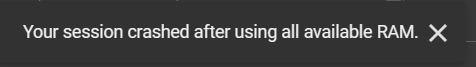

google colab aja nggak kuat mau boosting

In [24]:
# coba DT

model24_dt = DecisionTreeClassifier()

x24_train = df4_train.drop('CustChannel', axis=1)
y24_train = df4_train['CustChannel']
x24_train, x24_test, y24_train, y24_test = train_test_split(x24_train, y24_train, test_size=0.2, random_state=42)

model24_dt = DecisionTreeClassifier()
model24_dt.fit(x24_train, y24_train)

predict24_dt = model24_dt.predict(x24_test)
print(classification_report(y24_test, predict24_dt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     84076
           1       0.67      0.67      0.67      3849
           2       0.67      0.68      0.68      4068

    accuracy                           0.95     91993
   macro avg       0.77      0.78      0.77     91993
weighted avg       0.95      0.95      0.95     91993



In [28]:
param_grid = {"max_depth": range(1,50,2)}

# verbose hanya setting untuk melaporkan proses grid
grid25_tune = GridSearchCV(model24_dt, param_grid,cv=5, verbose = 1, return_train_score=True)
grid25_tune.fit(x24_train, y24_train)

print('best_param: ',grid25_tune.best_params_,'\n',
      'best_score: ',grid25_tune.best_score_
     )

Fitting 5 folds for each of 25 candidates, totalling 125 fits
best_param:  {'max_depth': 23} 
 best_score:  0.9469085696680978


In [29]:
# tinggi banget, coba diapply

model25_dt = DecisionTreeClassifier()

x25_train = df4_train.drop('CustChannel', axis=1)
y25_train = df4_train['CustChannel']
x25_train, x25_test, y25_train, y25_test = train_test_split(x25_train, y25_train, test_size=0.2, random_state=42)

model25_dt = DecisionTreeClassifier(max_depth=23)
model25_dt.fit(x25_train, y25_train)

predict25_dt = model25_dt.predict(x25_test)
print(classification_report(y25_test, predict25_dt))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     84076
           1       0.71      0.63      0.67      3849
           2       0.71      0.63      0.67      4068

    accuracy                           0.95     91993
   macro avg       0.80      0.75      0.77     91993
weighted avg       0.95      0.95      0.95     91993



In [30]:
# prediksi df25_test
df25_test = df4_test.copy()

x25_test = df25_test.drop('ID', axis=1).copy()
y25_test = model25_dt.predict(x25_test)

# masukan kolom prediksi ke df_test baru hasil copy df4_test yang masih ada kolom ID

df25_test['CustChannel'] = y25_test

In [31]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df25_test['CustChannel'] = df25_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit16 = df25_test[['ID', 'CustChannel']].copy()
df_submit16.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [32]:
df_submit16.to_csv('submit16_alredho.csv', index=False)

XGB Train    0.998960
XGB Test     0.937704
dtype: float64

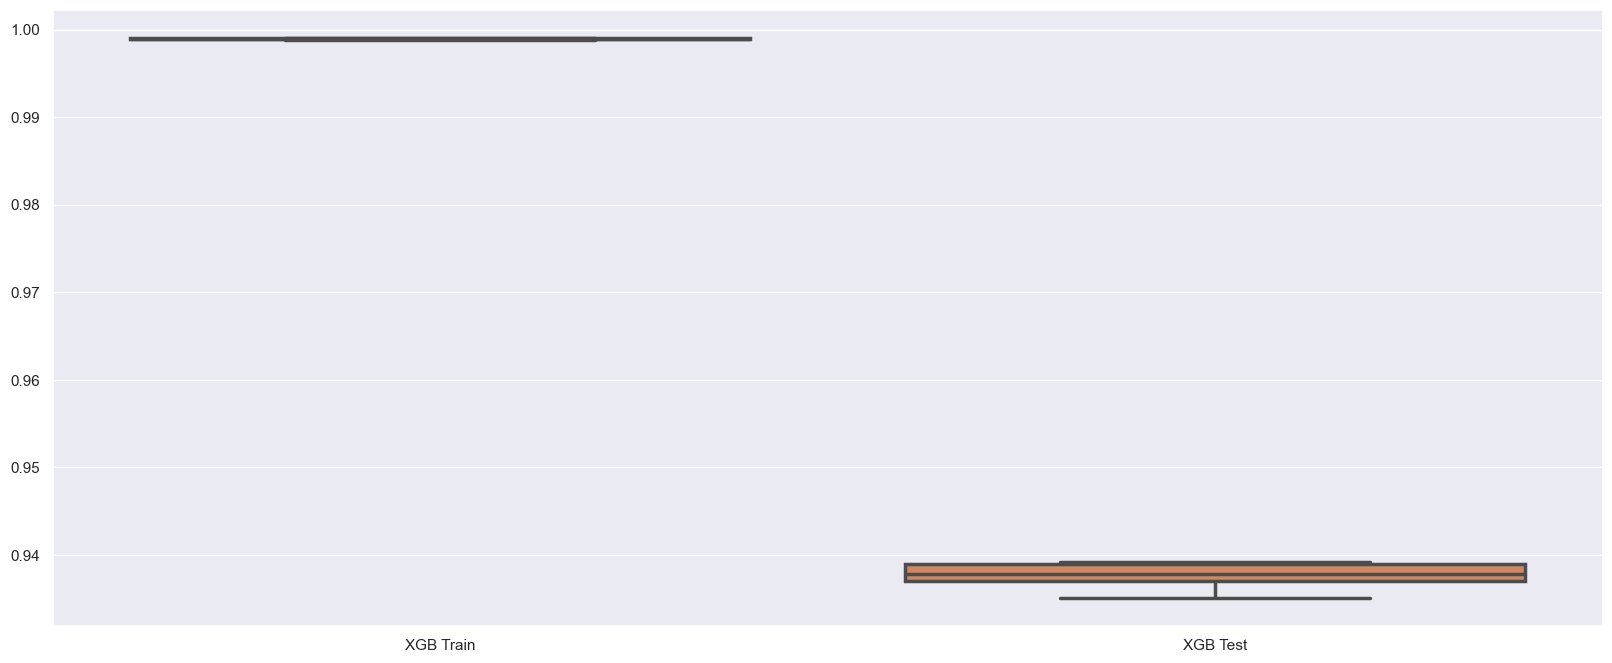

In [51]:
# coba boost dt

df26_trainsamp = df4_train.groupby('CustChannel').apply(lambda s: s.sample(min(len(s), 200000)))

x26_train = df26_trainsamp.drop('CustChannel', axis=1)
y26_train = df26_trainsamp['CustChannel']
x26_train, x26_test, y26_train, y26_test = train_test_split(x26_train, y26_train, test_size=0.2, random_state=42)

model26_xgb = XGBClassifier(eval_metric='logloss', max_depth=20, n_estimators=50)
score26_xgb = cross_validate(model26_xgb, x26_train, y26_train, scoring='accuracy', cv=10, return_train_score= True)
column26 = {'XGB Train': score26_xgb['train_score'], 'XGB Test': score26_xgb['test_score']}
df26_train = pd.DataFrame(data=column26)
plot = sns.boxplot(data = df26_train, linewidth=2.5)
df26_train.mean()

In [52]:
model26_xgb.fit(x26_train, y26_train)

predict26_dt = model26_xgb.predict(x26_test)
print(classification_report(y26_test, predict26_dt))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     39881
           1       0.85      0.70      0.77      3883
           2       0.87      0.69      0.77      4121

    accuracy                           0.94     47885
   macro avg       0.89      0.79      0.84     47885
weighted avg       0.93      0.94      0.93     47885



In [53]:
# prediksi df26_test
df26_test = df4_test.copy()

x26_test = df26_test.drop('ID', axis=1).copy()
y26_test = model26_xgb.predict(x26_test)

# masukan kolom prediksi ke df_test baru hasil copy df4_test yang masih ada kolom ID

df26_test['CustChannel'] = y26_test

In [54]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df26_test['CustChannel'] = df26_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit17 = df26_test[['ID', 'CustChannel']].copy()
df_submit17.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [55]:
df_submit17.to_csv('submit17_alredho.csv', index=False)

XGB Train    0.998960
XGB Test     0.937704
dtype: float64

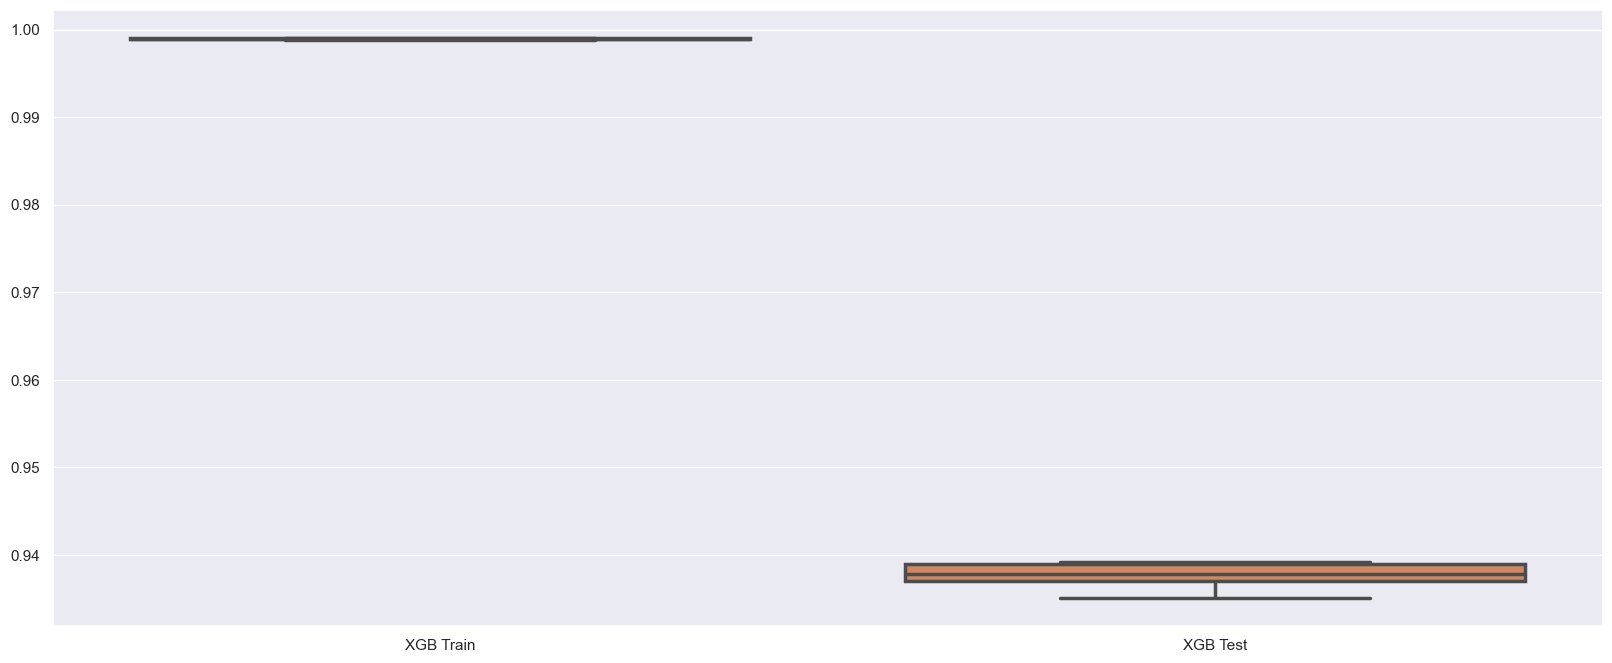

In [56]:
# boost lagi

df27_trainsamp = df4_train.groupby('CustChannel').apply(lambda s: s.sample(min(len(s), 200000)))

x27_train = df27_trainsamp.drop('CustChannel', axis=1)
y27_train = df27_trainsamp['CustChannel']
x27_train, x27_test, y27_train, y27_test = train_test_split(x27_train, y27_train, test_size=0.2, random_state=42)

model27_xgb = XGBClassifier(eval_metric='logloss', max_depth=30, n_estimators=60)
score27_xgb = cross_validate(model27_xgb, x27_train, y27_train, scoring='accuracy', cv=10, return_train_score= True)
column27 = {'XGB Train': score26_xgb['train_score'], 'XGB Test': score26_xgb['test_score']}
df27_train = pd.DataFrame(data=column27)
plot = sns.boxplot(data = df27_train, linewidth=2.5)
df27_train.mean()

In [57]:
model27_xgb.fit(x27_train, y27_train)

predict27_dt = model27_xgb.predict(x27_test)
print(classification_report(y27_test, predict27_dt))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     39881
           1       0.86      0.73      0.79      3883
           2       0.86      0.72      0.78      4121

    accuracy                           0.94     47885
   macro avg       0.89      0.81      0.85     47885
weighted avg       0.94      0.94      0.94     47885



In [58]:
# prediksi df27_test
df27_test = df4_test.copy()

x27_test = df27_test.drop('ID', axis=1).copy()
y27_test = model27_xgb.predict(x27_test)

# masukan kolom prediksi ke df_test baru hasil copy df4_test yang masih ada kolom ID

df27_test['CustChannel'] = y27_test

In [59]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df27_test['CustChannel'] = df27_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit18 = df27_test[['ID', 'CustChannel']].copy()
df_submit18.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [60]:
df_submit18.to_csv('submit18_alredho.csv', index=False)

In [65]:
# adjust sekali lagi

df28_trainsamp = df4_train.groupby('CustChannel').apply(lambda s: s.sample(min(len(s), 80000)))

x28_train = df28_trainsamp.drop('CustChannel', axis=1)
y28_train = df28_trainsamp['CustChannel']
x28_train, x28_test, y28_train, y28_test = train_test_split(x28_train, y28_train, test_size=0.2, random_state=42)

model28_xgb = XGBClassifier(eval_metric='logloss', max_depth=100, n_estimators=200)

model28_xgb.fit(x28_train, y28_train)

predict28_dt = model28_xgb.predict(x28_test)
print(classification_report(y28_test, predict28_dt))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     16151
           1       0.84      0.78      0.81      3793
           2       0.83      0.77      0.80      3941

    accuracy                           0.90     23885
   macro avg       0.86      0.83      0.85     23885
weighted avg       0.89      0.90      0.89     23885



In [66]:
# prediksi df28_test
df28_test = df4_test.copy()

x28_test = df28_test.drop('ID', axis=1).copy()
y28_test = model28_xgb.predict(x28_test)

# masukan kolom prediksi ke df_test baru hasil copy df4_test yang masih ada kolom ID

df28_test['CustChannel'] = y28_test

In [67]:
# decode kolom CustChannel

cust_decode = {0: 'Green', 1: 'Yellow', 2: 'Red'}
df28_test['CustChannel'] = df28_test['CustChannel'].map(cust_decode)

# ambil hanya kolom ID dan CustChannel untuk csv submit

df_submit19 = df28_test[['ID', 'CustChannel']].copy()
df_submit19.head()

,ID,CustChannel
0,C1,Green
1,C2,Green
2,C3,Green
3,C4,Green
4,C5,Green


In [68]:
df_submit19.to_csv('submit19_alredho.csv', index=False)